# Coding patterns:

# Sliding Window >>

### Sliding window max

In [115]:
from collections import deque

def slidingMax(nums=[2,4,3,5,6,10,3,2,1,9],w=3):
    q=deque()
    res=[]
    
    for i in range(w):
        while  q and nums[q[-1]]<nums[i]:
            q.pop()
        q.append(i)
    res.append(nums[q[0]])
    q.pop()
    
    print(res,q)
    
    for i in range(w,len(nums)):
        while q and nums[q[-1]]<nums[i]:
            q.pop()
        q.append(i)
        if i-w>=q[0]:
            q.popleft()
        res.append(nums[q[0]])
        
    print(res,q)
            
        
    
slidingMax() 

    

[4] deque([1])
[4, 5, 6, 10, 10, 10, 3, 9] deque([9])


### Minimum window subsequence

find a minimum window in s1 that contains all the characters of the s2 in the same order or 
sequences window may have addtional charaters than s2

In [116]:
def MinWindow(s1='abrahambalci',s2='abc'):
    i,j=0,0
    while i<len(s1):
        if s1[i]==s2[j]:
            j+=1
        if j==len(s2):
            winStart=i
            winEnd=i+1
            j-=1
            while j>=0:
                if s1[winStart]==s2[j]:
                    j-=1
                winStart-=1    
        i+=1
        
    return s1[winStart+1:winEnd]

MinWindow()

'ambalc'

### Minimum Window SubString

In [117]:
def minWindow( s='ADOBECODEBANC', t='ABC'):

    if t=='': return ''

    window,countT={},{}
    res,LenRes=[-1,-1],float('inf')

    for ch in t:
        countT[ch]=1+countT.get(ch,0)

    have,need=0,len(countT)
    l=0

    for r in range(len(s)):
        ch=s[r]
        window[ch]=1+window.get(ch,0)
        if ch in countT and window[ch]==countT[ch]:
            have+=1

        while have==need:
            if (r-l+1)<LenRes:
                res=[l,r]
                LenRes=(r-l+1)
                print(s[l:r+1],l,r-1,window,countT,s[l])
            #pop left ch from window 
            window[s[l]]-=1
            if s[l] in countT and window[s[l]]<countT[s[l]]:
                have-=1
            l+=1

    l,r=res
    return s[l:r+1] if LenRes!=float('inf') else ''

minWindow()

ADOBEC 0 4 {'A': 1, 'D': 1, 'O': 1, 'B': 1, 'E': 1, 'C': 1} {'A': 1, 'B': 1, 'C': 1} A
EBANC 8 11 {'A': 1, 'D': 0, 'O': 0, 'B': 1, 'E': 1, 'C': 1, 'N': 1} {'A': 1, 'B': 1, 'C': 1} E
BANC 9 11 {'A': 1, 'D': 0, 'O': 0, 'B': 1, 'E': 0, 'C': 1, 'N': 1} {'A': 1, 'B': 1, 'C': 1} B


'BANC'

### Longest Substring Without Repeating Characters

Input: s = "abcabcbb"
Output: 3
Explanation: The answer is "abc", with the length of 3.

In [118]:
def lss(s='aaxaaabcabcbb'):
    l=0
    res=0
    visited=set()
    for r in range(len(s)):
        while s[r] in visited:
            visited.remove(s[l])
            l+=1
        print(visited)
        visited.add(s[r])
        res=max((r-l+1),res)
    return res
lss()
        

set()
set()
{'a'}
{'x'}
set()
set()
{'a'}
{'a', 'b'}
{'b', 'c'}
{'a', 'c'}
{'a', 'b'}
{'c'}
set()


3

### Repeated DNA Sequences


In [119]:
def RepeatedDNA(s='AAAAAAAAAAA',w=10):
    uSeq=set()
    res=[]
    for i in range(len(s)-w+1):
        cur=""
        for j in range(i,i+w):
            cur+=s[j]
        if cur not in uSeq:
            uSeq.add(cur)
        else:
            if not cur in res:
                res.append(cur)
    return res#[seq for seq in uSeq if uSeq[seq]>1]

RepeatedDNA()
        

['AAAAAAAAAA']

# Two Pointers >>

### Reverse elements of an array

In [120]:
def rev(s='aabcd'):
    l,r=0,len(s)-1
    s=list(s)
    while l<=r:
        s[l],s[r]=s[r],s[l]
        l+=1
        r-=1
    return ''.join(s)
rev()

'dcbaa'

### Three Sum

In [14]:
# with target 0 and wiouth repeated numbers as a,b,c
def threeSum2( nums=[-1,0,1,2,-1,-4]):
    """
    :type nums: List[int]
    :rtype: List[List[int]]
    """
    res=[]
    nums.sort()
    for i,a in enumerate(nums):
        if i>0 and a==nums[i-1]:
            continue 
        l,r=i+1,len(nums)-1
        while l<r:
            threeS=a+nums[l]+nums[r]
            if threeS>0:
                r-=1
            elif threeS<0:
                l+=1
            else:
                res.append([a,nums[l],nums[r]])
                l+=1
                while nums[l]==nums[l-1] and l<r:
                    l+=1
    return res

threeSum2()

[[-1, -1, 2], [-1, 0, 1]]

### Reverse words in sentence

In [138]:
def reverse_words(sentence='this is a good day'):
   
    words=[[word] for word in sentence.split(' ')]
    #print(words)
    l,r=0,len(words)-1
    while l<r:
        words[l],words[r]=words[r],words[l]
        l+=1
        r-=1
        
    return ' '.join([''.join(word) for word in words])

reverse_words()

'day good a is this'

### Is Palindrome II 

In [162]:
def palindrome(s='abcb'):
    l,r=0,len(s)-1
    while l<r:
        if s[l]==s[r]:
            l+=1
            r-=1
        else:
            str1=s[:l]+s[l+1:]
            str2=s[:r]+s[r+1:]
            return str1==str1[::-1] or str2==str2[::-1]

    return True
            


palindrome()    

True

# Fast and Slow Pointers

### Palindrome Linked list

In [138]:
#O(n) time, O(n) space
def isPalindrome2( head):
    """
    :type head: ListNode
    :rtype: bool
    """
    nums=[]

    cur=head
    while cur:
        nums.append(cur.val)
        cur=cur.next

    l,r=0,len(nums)-1
    while l<=r:
        if nums[l]!=nums[r]:
            return False
        l+=1
        r-=1
    return True

# O(n) time, O(1) space
# find the middle node of the list using fast and slow pointers, then reverse the second half and compare both halfs
def isPalindrome(head):
    fast=slow=head
    while fast and fast.next:
        fast=fast.next.next
        slow=slow.next
    
    #reverse the second half of the list
    prev,cur=None,slow
    while cur:
        nex=cur.next
        cur.next=prev
        prev=cur
        cur=nex
        
    #check if firt half is equal to the reversed second half of the list
    cur1,cur2=prev,head
    while cur1:
        if cur1.val!=cur2.val:
            return False
        cur1=cur1.next
        cur2=cur2.next
    return True

# Merge Intervals

### insert interval

In [163]:
def insert_intervals(intervals=[[1,2],[3,5],[6,7],[8,10],[12,16]],newinterval=[4,8]):
    res=[]
    for i,v in enumerate(intervals):
        if newinterval[1]<v[0]:
            res.append(newinterval)
            return res+intervals[i:]
        elif newinterval[0]>v[1]:
            res.append(v)
        else:
            newinterval=[min(v[0],newinterval[0]),max(v[1],newinterval[1])]
    res.append(newinterval)
    return res
insert_intervals()

[[1, 2], [3, 10], [12, 16]]

### Meeting rooms ~ schedule tasks on minimum machines

minimum number of rooms that can accomedate all the meetings

In [170]:
from heapq import heapify,heappush,heappop

def mettingRooms( a=[[1, 3],[2, 5],[4, 8]]):
    a=sorted(a,key=lambda x:x[0])
    print(a)
    heap=[]
    heapify(heap)
    heappush(heap,a[0][1])
    
    for i in range(1,len(a)):
        if heap[0]<a[i][0]:
            heappop(heap)
        heappush(heap,a[i][1])
    print(heap)
    return len(heap)

mettingRooms()
        

[[1, 3], [2, 5], [4, 8]]
[5, 8]


2

### Employee Free time

We are given a list schedule of employees, which represents the working time for each employee.

Each employee has a list of non-overlapping Intervals, and these intervals are in sorted order.

Return the list of finite intervals representing common, positive-length free time for all employees, also in sorted order.
Input: schedule = [[[1,2],[5,6]],[[1,3]],[[4,10]]]
Output: [[3,4]]
Explanation:
There are a total of three employees, and all common
free time intervals would be [-inf, 1], [3, 4], [10, inf].
We discard any intervals that contain inf as they aren't finite.

Given a list of lists l, how to flatten a list

flat_list = [item for sublist in l for item in sublist]

In [180]:
def freeTime(schedule = [[[1,2],[5,6]],[[1,3]],[[4,10]]]):
    schedule=[intv  for emp in schedule for intv in emp ]
    print(schedule)
    schedule=sorted(schedule,key=lambda x:x[0])
    endTime=schedule[0][1]
    res=[]
    for i in range(1,len(schedule)):
        if schedule[i][0]>endTime:
            res.append([endTime,schedule[i][0]])
        endTime=max(endTime,schedule[i][1])
    return res

freeTime()
            

[[1, 2], [5, 6], [1, 3], [4, 10]]


[[3, 4]]

# Two heaps

### Maximize capital

Input: k = 2, w = 0, profits = [1,2,3], capital = [0,1,1]
Output: 4
Explanation: Since your initial capital is 0, you can only start the project indexed 0.
After finishing it you will obtain profit 1 and your capital becomes 1.

In [ ]:
from heapq import heapify,heappush,heappop
class Solution(object):
    def findMaximizedCapital(self, k, w, profits, capital):

        minheap_cap=[]
        maxheap_pro=[]
        heapify(minheap_cap)
        heapify(maxheap_pro)

        for i in range(len(capital)):
            heappush(minheap_cap,(capital[i],i))

        for _ in range(k):

            while minheap_cap and w>=minheap_cap[0][0]:
                c,i=heappop(minheap_cap)
                heappush(maxheap_pro,(-profits[i],i))

            if not maxheap_pro:
                break

            j=-heappop(maxheap_pro)[0]
            w+=j
        return w

### find the Median of a stream

In [182]:
from heapq import heapify, heappush, heappop
class MedianFinder(object):

    def __init__(self):
        self.smallH=[]
        self.largeH=[]
        heapify(self.smallH)
        heapify(self.largeH)

        

    def addNum(self, num):
        """
        :type num: int
        :rtype: None
        """
        #1.start adding nums to max heap in the left that hold small numbers
        heappush(self.smallH,-num)
        
        #2.make sure every top of max heap is always smaller that the top of min heap 
        if self.smallH and self.largeH and self.smallH[0]>self.largeH:
            val=heappop(self.smallH) 
            heappush(self.largeH,-val)
            
        #3.check if the heap lengths are balanced 
        if len(self.smallH)>len(self.largeH):
            val=heappop(self.smallH) 
            heappush(self.largeH,-val)

        if len(self.smallH)<len(self.largeH):
            val=heappop(self.largeH) 
            heappush(self.smallH,-val)

    def findMedian(self):
        """
        :rtype: float
        """
        if len(self.smallH)>len(self.largeH):
            return -self.smallH[0]
        if len(self.smallH)<len(self.largeH):
            return self.largeH[0]
        return (self.largeH[0]-self.smallH[0])/2.0
        

# K-Way Merge for sorted arrays

### Merge Sorted Array

In [188]:
def arrMerge(nums1=[10,20,30,0,0], m=3, nums2=[2,5], n=2):
    """
    :type nums1: List[int]
    :type m: int
    :type nums2: List[int]
    :type n: int
    :rtype: None Do not return anything, modify nums1 in-place instead.
    """
    if m==0: 
        nums1[m]= nums2[m]
        return nums1 
    i,j=m-1,n-1 
    ind=len(nums1)-1
    while i>=0 and j>=0:
        if nums1[i]>=nums2[j]:
            nums1[ind]=nums1[i]
            i-=1
        else:
            nums1[ind]=nums2[j]
            j-=1
        ind-=1

    while j>=0:
        nums1[ind]=nums2[j]
        j-=1
        ind-=1
        

    return nums1

arrMerge()

[2, 5, 10, 20, 30]

### Kth Smallest Element in a Sorted Matrix

In [189]:
def kthSmallest(matrix = [[1,5,9],[10,11,13],[12,13,15]], k = 8):

    heap=[]
    rows=len(matrix)
    cols=len(matrix[0])

    for r in range(rows):
        for c in range(cols):
            heappush(heap,matrix[r][c])

    for i in range(k):
        res=heappop(heap)

    return res

kthSmallest()

13

### Find K Pairs with Smallest Sums

In [191]:
from heapq import *

def k_smallest_pairs(list1=[1, 2, 9] ,list2= [4, 7, 9] , k=3):
    result = []
    heap=[]
    # TODO: Write your code here
    for i in range(len(list1)):
        for j in range(len(list2)):
            heappush(heap,(list1[i]+list2[j],i,j))

    for i in range(min(k,len(list1)*len(list2))):
            sum_,i_,j_=heappop(heap)
            result.append([list1[i_],list2[j_]])

    return result

k_smallest_pairs()

[[1, 4], [2, 4], [1, 7]]

### Merge K sorted Linked lists 

In [ ]:
def mergeKLists(self,lists):
    heap=[]
    head=None
    cur=None
    for l in lists:
        while l:
            heappush(heap,l.val)
            l=l.next

    while heap:
        if not head:
            head=ListNode(heappop(heap))
            cur=head
        else:
            cur.next=ListNode(heappop(heap))
            cur=cur.next

    return head

In [192]:
#solution2

def mergeKLists( lists):

    def merge2lists(h1,h2):
        dum=ListNode()
        cur=dum
        p1,p2=h1,h2

        while p1 and p2:
            if p1.val<p2.val:
                cur.next=p1
                p1=p1.next
            else:
                cur.next=p2
                p2=p2.next
            cur=cur.next

        if p1:
            cur.next=p1
        if p2:
            cur.next=p2
        return dum.next

    if not lists or lists==0:return None

    while len(lists)>1:
        mergedlists=[]
        for i in range(0,len(lists),2):
            l1=lists[i]
            l2=lists[i+1] if (i+1)<len(lists) else None
            mergedlists.append(merge2lists(l1,l2))
        lists=mergedlists
    return lists[0]

### Median of 2 sorted array

In [193]:
def find_median(nums1=[1, 5, 8] , nums2=[4, 7, 9]):
# first merge 2 sorted arrays with o(n) 
    n=len(nums1)-1
    m=len(nums2)-1
    res=[0]* (len(nums1)+len(nums2))
    k=len(nums1)+len(nums2)-1
    while n>=0 and m>=0:
        if nums1[n]>=nums2[m]:
            res[k]=nums1[n]
            n-=1
        else:
            res[k]=nums2[m]
            m-=1
        k-=1

    while n>=0:
        res[k]=nums1[n]
        n-=1
        k-=1

    while m>=0:
        res[k]=nums2[m]
        m-=1
        k-=1

    
    mid=len(res)//2
    print(res)

    return  (res[mid]+res[mid-1])/2.0 if len(res)%2==0 else res[mid]

find_median()


[1, 4, 5, 7, 8, 9]


6.0

# Top K Elements

### Kth Largest Element in a Stream

In [194]:
from heapq import *
class KthLargest(object):

    def __init__(self, k, nums):
        self.heap=nums
        heapify(self.heap)
        self.k=k

        while len(self.heap)>k:
            heappop(self.heap)
        

    def add(self, val):
        heappush(self.heap,val)
        
        if len(self.heap)>self.k:
            heappop(self.heap)
        return self.heap[0]
    

### Reorgnizing string

In [195]:
# importing libraries
from collections import Counter
from heapq import *

def reorganize_string(input_string='aaabc'):
    # Write your code here
    hashmap=Counter(input_string)
    print(hashmap)
    heap=[]
    res=''
    for ch,cnt in hashmap.items():
        heappush(heap,(-cnt,ch))
    print(heap)

    prev=None
    while heap or prev:
        if prev and not heap:
            return ''
        cnt,ch=heappop(heap)
        res+=ch
        cnt+=1

        print(res)

        if prev:
            heappush(heap,prev)
            prev=None

        if cnt!=0:
            prev=(cnt,ch)


    return res

reorganize_string()

    


Counter({'a': 3, 'b': 1, 'c': 1})
[(-3, 'a'), (-1, 'b'), (-1, 'c')]
a
ab
aba
abac
abaca


'abaca'

# Modified binary search

### Binary search, recursive and iterative approach

In [42]:
def bs_rec(nums=[1,2,3,4,5,6],target=6):
    if len(nums)==0:
        return -1
    mid=len(nums)//2
    if nums[mid]==target:
        return mid
    elif nums[mid]>target:
        return bs_rec(nums[:mid])
    else:
        result=bs_rec(nums[mid+1:])
        return mid+result+1 if result>=0 else -1


bs_rec()

5

In [197]:
def bs_iterative(nums=[1,2,3,4,5,6],target=2):
    l,h=0,len(nums)-1
    while l<=h:
        mid=(h-l)//2+l
        if nums[mid]==target:
            return mid
        elif nums[mid]>target:
            h=mid-1
        else:
            l=mid+1
    return -1

bs_iterative()
            

1

### Binary search in rotated array

In [91]:
def search( nums=[4,5,6,7,0,1,2], target=4):

    l,h=0,len(nums)-1
    def search_(nums,l,h,t):
        if l>h:
            return -1
        #print(l,h)
        mid=(l+h)//2
        if nums[mid]==t:
            return mid
        elif  nums[l]<=t<nums[mid]:
            return search_(nums,l,mid-1,t)
        elif nums[mid]<t<= nums[h] :
            return search_(nums,mid+1,h,t)
        elif   nums[mid]>nums[h]:
            return search_(nums,mid+1,h,t)
        elif   nums[l]>nums[mid]:
            return search_(nums,l,mid-1,t)
        else:
            return -1

    return search_(nums,l,h,target)

search()

0

In [203]:
#check mid, check sorted left, check sorted right, chech unsorted left, unsorted right
def binary_search_rotated(nums=[4,5,6,7,0,1,2], target=1):
    l,r=0,len(nums)-1
    
    while l<=r:
        mid=(l+r)//2
        if nums[mid]==target:
            return mid
        elif nums[l]<=target<nums[mid]:
            r=mid-1
        elif nums[mid]<target<=nums[r]:
            l=mid+1
        elif nums[l]>nums[mid]:
            r=mid-1
        elif nums[mid]>nums[r]:
            l=mid+1
        else:
            return -1

binary_search_rotated()
        

5

### First bad version

In [205]:
def first_bad_version(nums=[0,0,1,1,1,1]):
    l,r =0,len(nums)-1
    
    while l<=r:
        mid=(l+r)//2
        if nums[mid]==1:
            if nums[mid-1]==0:
                return mid
            r=mid-1
        else:
            l=mid+1
            
first_bad_version()

2

### Random Pick with Weight 

In [220]:
import random

def pick_index(nums=[2,90,8]):
    cum_sums=[]
    cum_sum=0
    for w in nums:
        cum_sum+=w
        cum_sums.append(cum_sum)
        
    target=random.randint(0,cum_sum)
    
    
    #binary search random target in cu_sums array
    l,r=0,len(cum_sums)
    while l<=r:
        mid=(l+r)//2
        if cum_sums[mid]==target:
            return mid
        elif cum_sums[mid]>target:
            r=mid-1
        else:
            l=mid+1
    print(cum_sums,target,' picked index-->',l)
    return l
    
for i in range(10):    
    pick_index()      

[2, 92, 100] 0  picked index--> 0
[2, 92, 100] 99  picked index--> 2
[2, 92, 100] 56  picked index--> 1
[2, 92, 100] 32  picked index--> 1
[2, 92, 100] 10  picked index--> 1
[2, 92, 100] 7  picked index--> 1
[2, 92, 100] 45  picked index--> 1
[2, 92, 100] 84  picked index--> 1
[2, 92, 100] 7  picked index--> 1
[2, 92, 100] 49  picked index--> 1


### K closest elements to item x of a sorted array

In [223]:
def findClosestElements( arr = [1,2,3,4,5], k = 2, x = 3):

    def b_s(arr,x):        
        l,r =0,len(arr)-1
        while l<=r:
            mid=(l+r)//2
            if arr[mid]==x:
                return mid
            elif arr[mid]>x:
                l=mid-1
            else:
                r=mid+1
        return l

    if len(arr)==k:
        return arr

    wl=b_s(arr,x)-1
    wr=wl+1

    while wr-wl-1<k:
        #print(wl,wr,k)
        if wl==-1:
            wr+=1
            continue
        if wr==len(arr) or abs(arr[wl]-x)<=abs(arr[wr]-x) :
            wl-= 1
        else:
            wr+=1

    return arr[wl+1:wr]

findClosestElements()

[2, 3]

# Subsets

In [227]:
def get_all_subsets(v=[1,3,5]):
    num_subsets=2**len(v)
    sets=[]
    for i in range(0,num_subsets):
        st=set([])
        for j in range(len(v)):
            if get_bit(i,j)==1:
                st.add(v[j])
                #print(st)
        sets.append(list(st))
    return sets

def get_bit(i,j):
    temp=1<<j
    if i&temp==0:
        return 0
    return 1

get_all_subsets()

[[], [1], [3], [1, 3], [5], [1, 5], [3, 5], [1, 3, 5]]

In [248]:
def permute_word(word='pos'):
    result = []
    path=''

    def perm(word,path):
        if not word:
            result.append(path)
            return
        
        for i in range (len(word)):
            perm(word[:i]+word[i+1:],word[i]+path) 

    perm(word,path)
    return result

permute_word()

['sop', 'osp', 'spo', 'pso', 'ops', 'pos']

In [247]:
def letter_combinations(digits='92'):
    dic={'2':'abc','3':'def','4':'ghi','5':'jkl','6':'mno','7':'pqrs','8':'tuv','9':'wxyz'}
    result,path=[],''
    
    def perm(digits,path):
        if not digits:
            result.append(path)
            return 
        
        pre=dic[digits[0]]
        
        for ch in pre:
            perm(digits[1:],path+ch)
   
    perm(digits,path)
    return result

letter_combinations()
            

['wa', 'wb', 'wc', 'xa', 'xb', 'xc', 'ya', 'yb', 'yc', 'za', 'zb', 'zc']

### Generate valid nested parantecies


In [249]:
def pgen(n=3):
    path=''
    res=[]
    def gen_(l,r,path):
        if l==r==n:
            res.append(path)
            return 
        if r>l: return 
        if l<n:
            gen_(l+1,r,path+'(')
        if r<n:
            gen_(l,r+1,path+')')
        
        return res
    
    return gen_(0,0,path)
pgen()

['((()))', '(()())', '(())()', '()(())', '()()()']

### Get k sum subsets

In [258]:
def getbit(i,j):
    if (i& (1<<j))==0:
        return False
    return True

def get_k_sum_subsets(set_of_integers=[1,2,3,4,5,6], target_sum=10):
    # Write your code here
    subsets = []  
    n=2**len(set_of_integers)

    for i in range(n):
        curset=set()
        runSum=0
        for j in range(len(set_of_integers)):
            if getbit(i,j):
                runSum+=set_of_integers[j]
                curset.add(set_of_integers[j])
        #print(curset,runSum)
        if runSum==target_sum:
            subsets.append(list(curset))
    return subsets

get_k_sum_subsets()

[[1, 2, 3, 4], [2, 3, 5], [1, 4, 5], [1, 3, 6], [4, 6]]

# Trees Depth First Search

### Flatten a binary tree to linked list

In [259]:

def flatten( root):

    def dfs(root):
        if not root:
            return 

        LeftTail=dfs(root.left)
        RightTail=dfs(root.right)

        if LeftTail:
            LeftTail.right=root.right
            root.right=root.left
            root.left=None
        last=RightTail or LeftTail or root
        return last

    return dfs(root)

### Max depth or height of a binary tree

In [19]:
class treeNode:
    def __init__(self,val=0,left=None,right=None):
        self.val=val
        self.left=left
        self.right=right

def treeHieght(root=treeNode(             1,
                            treeNode(2),         treeNode(3,
                                            treeNode(4),     treeNode(5)))):
    if not root:
        return 0
    hl=treeHieght(root.left)
    hr=treeHieght(root.right)
    return 1+max(hl,hr)


treeHieght()

3

### Diameter of binary tree

In [260]:
class treeNode:
    def __init__(self,val=0,left=None,right=None):
        self.val=val
        self.left=left
        self.right=right

def treeDiam( root=treeNode(               1,
                            treeNode(2),          treeNode(3,
                                            treeNode(4),     treeNode(5,
                                                                      treeNode(6))))):
    diam=0
    def treeHieght(root=root):
        nonlocal diam
        if not root:
            return -1
        leftH=treeHieght(root.left)
        rightH=treeHieght(root.right)
        diam=max(diam,2+leftH+rightH)
        return 1+max(leftH,rightH)
    
    treeHieght(root)
    return diam

treeDiam()

4

### Min depth of a binary tree

In [94]:
def minDepth( root=treeNode(               1,
                            treeNode(2),          treeNode(3,
                                            treeNode(4),     treeNode(5)))):

    def height(root):
        if not root:
            return 0
        lh=height(root.left)
        rh=height(root.right)
        if root.left and root.right:
            return 1+min(lh,rh)
        if not root.left:
            return 1+rh
        if not root.right:
            return 1+lh

    return height(root)

minDepth()


2

### Binary Tree Paths

In [271]:
'''
       1
     /   \
    5     3
   / \   / \
   N  6 N   N
'''
def treePaths(root=treeNode(1,treeNode(5,None,treeNode(6)),treeNode(3,None,None))):
    res=[]
    path=''
    
    def dfs(root,path,res):
        if not root: return 
        path+=(str(root.val)+'->')
        
        if not root.left and not root.right:
            res.append(path[:-2])       

        dfs(root.left,path,res)
        dfs(root.right,path,res)
     
        return res

    return dfs(root,path,res)

treePaths()


['1->5->6', '1->3']

In [276]:
'''
       1
     /   \
    5     3
   / \   / \
   N  6 N   N
'''
import copy
def treePaths(root=treeNode(1,treeNode(5,None,treeNode(6)),treeNode(3,None,None))):
    res=[]
    path=[]
    
    def dfs(root,path,res):
        if not root: return 
        path.append(root.val)
        
        if not root.left and not root.right:
            res.append(copy.copy(path))       

        dfs(root.left,path,res)
        dfs(root.right,path,res)
        path.pop()
     
        return res

    return dfs(root,path,res)

treePaths()


[[1, 5, 6], [1, 3]]


### invert Binary Tree

In [277]:


def invertTree(root=treeNode(1,treeNode(2,treeNode('a'),treeNode('b')),treeNode(3,treeNode('c'),treeNode('d')))):
    if not root:
        return 
    root.left,root.right=root.right,root.left
    invertTree(root.left)
    invertTree(root.right)
    return root

def printTree(root=root):
    if root==None:
        return
    printTree(root.left)
    print(root.val,end='')
    printTree(root.right)
    
    
printTree(root)
print()
printTree(invertTree(root))

d3c1b2a
a2b1c3d

# Arrays

https://lei-d.gitbook.io/leetcode/array

## Squares of a Sorted Array

In [1]:
def sortedSquares(nums=[-4,-1,0,3,10]):
    """
    :type nums: List[int]
    :rtype: List[int]
    """
    l,r=0,len(nums)-1
    res=[0]*len(nums)
    i=r
    while l<=r:
        if abs(nums[l])>=abs(nums[r]):
            res[i]=nums[l]**2
            l+=1
        else:
            res[i]=nums[r]**2
            r-=1
        i-=1
    return res

sortedSquares()

[0, 1, 9, 16, 100]

## Array Diagonal Traverse


In [1]:
def findDiagonalOrder( mat=[[1,2,3],
                            [4,5,6],
                            [7,8,9]]):
    """
    :type mat: List[List[int]]
    :rtype: List[int]
    """
    m,n=len(mat),len(mat[0])
    arr=[0]*(m*n)
    out2=[]
    i,row,col=0,0,0
    up=True
    while row<m and col<n:
        if up:
            while row>0 and col<n-1:
                arr[i]=mat[row][col]
                print(arr[i],end=' ')
                i+=1
                row-=1
                col+=1
            arr[i]=mat[row][col]
            print(arr[i],end=' ')
            i+=1
            if col==n-1:
                row+=1
            else:
                col+=1
        else:  #downward diagonal
            while row<m-1 and col>0:
                arr[i]=mat[row][col]
                print(arr[i],end=' ')
                i+=1
                row+=1
                col-=1
            arr[i]=mat[row][col]
            print(arr[i],end=' ')
            i+=1
            if row==m-1:
                col+=1
            else:
                row+=1
        up=not up
        print('\n')
    return arr

findDiagonalOrder()

1 

2 4 

7 5 3 

6 8 

9 



[1, 2, 4, 7, 5, 3, 6, 8, 9]

## Is Subsequence

In [2]:
def isSubsequence(s='ace',t='abcde'):
    i,j=0,0
    n,m=len(s),len(t)
    while i<n and j<m:
        if s[i]==t[j]:
            i+=1
        j+=1
    if i==n:
        return True
    return False

isSubsequence()

True

# Smallest Non-constructible Value

In [10]:
def smallest_non_constructible_value(A=[1,2,4]):
    # linear search
    res = 0
    for a in sorted(A):
        if a > res + 1:
            break
        res += a
    return res + 1

smallest_non_constructible_value()

8

In [31]:
ch=['a','z','A','Z']
for i in range (len(ch)):
    print(ord(ch[i]))
if ord('a') in range(ord('a'),ord('z')):
    print(True)

97
122
65
90
True


## Minimum Rounds to Complete All Tasks

In [48]:
from collections import Counter

def minimumRounds(tasks=[2,2,3,3,2,4,4,4,4,4]):
    """
    :type tasks: List[int]
    :rtype: int
    """
    dic={task:0 for task in tasks}
    for task in tasks:
        dic[task]+=1

    #dic=Counter(tasks)
    res=0
    for freq in dic.values():
        if freq<2:
            return -1
        if freq==2:
            res+=1
        elif freq%3==0:
            res+=freq//3
        elif freq>3:
            res+=(freq//3)+1
    return res

minimumRounds()

4

## Add Binary

In [65]:
def addBinary( a='11', b='110'):
    """
    :type a: str
    :type b: str
    :rtype: str
    """
    a=a[::-1]
    b=b[::-1]
    res=''
    parity=0
    for i in range(max(len(a),len(b))):
        digit1=int(a[i]) if i<len(a) else 0
        digit2=int(b[i]) if i<len(b) else 0
        cur=(digit1+digit2+parity)%2
        parity=(digit1+digit2+parity)//2
        res+=str(cur)
    if parity:
        res+=str(parity)
    return res[::-1]

addBinary()

'1001'

## Minimum Number of Arrows to Burst Balloons

In [80]:
#merging interval finds union of two intervals. here we need to find the intersection of intervals
def findMinArrowShots(points=[[10,16],[2,8],[1,6],[7,12]]):
    """
    :type points: List[List[int]]
    :rtype: int
    """
    points=sorted(points,key=lambda x:x[0])
    print(points)
    res=[]
    for v in points:
        if  not res or v[0]>res[-1][1]:
            res.append(v)
        else:
            res[-1][0]=max(v[0],res[-1][0])
            res[-1][1]=min(v[1],res[-1][1])
        print (res)
    print(points)
    print(res)
    return 

findMinArrowShots()

[[1, 6], [2, 8], [7, 12], [10, 16]]
[[1, 6]]
[[2, 6]]
[[2, 6], [7, 12]]
[[2, 6], [10, 12]]
[[2, 6], [2, 8], [10, 12], [10, 16]]
[[2, 6], [10, 12]]


2

## Meeting Rooms

In [13]:
from queue import PriorityQueue

def mettingRooms( A=[[1, 18],[18, 23],[15, 29],[4, 15],[2, 11], [5, 13]]):
    
    
    A=sorted(A,key = lambda x:x[0])
    q=PriorityQueue()
    q.put(A[0][1])
    
    for i in range(1,len(A)):
        if A[i][0]>=q.queue[0]:
            q.get()
        q.put(A[i][1])
    
    return len(q.queue)
            

    
mettingRooms()

4

In [15]:

from heapq import heapify, heappop, heappush

def mettingRooms( A=[[1, 18],[18, 23],[15, 29],[4, 15],[2, 11], [5, 13]]):
        
    A=sorted(A,key = lambda x:x[0])

    minheap=[]
    heapify(minheap)
    heappush(minheap,A[0][1])
    
    for i in range(1,len(A)):
        if A[i][0]>=minheap[0]:
            heappop(minheap)
        heappush(minheap,A[i][1])
    
    return len(minheap)
            

    
mettingRooms()

4

## Delete Columns to Make Sorted


In [82]:
def minDeletionSize( strs=["cba",
                           "daf",
                           "ghi"]):
    """
    :type strs: List[str]
    :rtype: int
    """
    res=set()
    for col in range(len(strs[0])):
        oldch=strs[0][col]
        for row in range(1,len(strs)):
            if strs[row][col]<oldch:
                res.add(col) 
            oldch=strs[row][col]

    return len(res)

minDeletionSize()

1

## Detect Capital


In [84]:
def detectCapitalUse( word='Google'):
    """
    :type word: str
    :rtype: bool
    """
    if len(word)==1:
        return True

    allLower,firstUpperLastLower,allUpper=False,False,False

    if word[0].islower():
        allLower=True
    elif word[0].isupper() and word[-1].islower():
        firstUpperLastLower=True
    elif word[0].isupper() and word[-1].isupper():
        allUpper=True

    for ch in word[1:]:
        if allLower and ch.isupper():
            return False
        if firstUpperLastLower and ch.isupper():
            return False
        if allUpper and ch.islower():
            return False
    return True

detectCapitalUse()


True

## Counting Bits

In [27]:
def countBits(n=8):

    def bits(i):
        binaryI=bin(i)[2:]
        numOnes=0
        for bit in binaryI:
            if int(bit) & 1:
                numOnes+=1
        return binaryI,numOnes
            
        
        

    res=[0]*(n+1)
    for i in range(len(res)):
        res[i]=bits(i)

    return res

countBits()


[('0', 0),
 ('1', 1),
 ('10', 1),
 ('11', 2),
 ('100', 1),
 ('101', 2),
 ('110', 2),
 ('111', 3),
 ('1000', 1)]

## Gas Station

In [29]:
def canCircle(gas=[2,2,1],cost=[2,1,1]):
    if sum(gas)<sum(cost):
        return -1
    total,start=0,0
    for i in range(len(gas)):
        total+=gas[i]-cost[i]
        if total<0:
            start=i+1
            total=0
    return start

canCircle()

0

## Backspace String Compare

In [135]:
def backspaceCompare( s = "ab##", t = "c#d#"):

    s,t=list(s),list(t)
    sBack,tBack=[],[]

    for ch in s:
        if ch =='#': 
            if  sBack:
                sBack.pop()
        else:
            sBack.append(ch)

    for ch in t:
        if ch =='#':
            if tBack:
                tBack.pop()
        else:
            tBack.append(ch)

    return sBack==tBack

backspaceCompare()

True

## Is same tree

In [136]:
def isSameTree( p, q):

    if  not p and not q:
        return True

    if not p or not q or p.val!=q.val:
        return False

    return   self.isSameTree(p.left,q.left) and self.isSameTree(p.right,q.right) 

## Symmetric Tree

In [5]:
def isSymmetric( root=treeNode(               1,
                            treeNode(2,
                        treeNode(4),     treeNode(5)),          treeNode(2,
                                                               treeNode(5),     treeNode(4)))):

    def isMirror(p,q):
        if p==None and q==None:
            return True
        if not p or not q or p.val!=q.val:
            return False
        return isMirror(p.left,q.right) and isMirror(p.right,q.left)

    return isMirror(root.left,root.right)

isSymmetric()

True

## Max Colliniar points

In [191]:
from collections import defaultdict
def maxPoints(points=[[4,5],[4,-1],[4,0]]):
    """
    :type points: List[List[int]]
    :rtype: int
    """
    line={}
    coliniar=defaultdict(lambda: set())

    points=sorted(points,key=lambda x:x[0])
    for i in range(len(points)-1):
        for j in range(i+1,len(points)):

            if points[j][1]==points[i][1]:
                sl=0
                b=points[i][1]
            elif points[j][0]==points[i][0]:
                sl=points[j][0]
                b=None
            else:
                sl=(points[j][1]-points[i][1])/(points[j][0]-points[i][0])
                b=points[j][1]-(sl*points[j][0])#y=mx+b

            coliniar[(sl,b)].add(i)
            coliniar[(sl,b)].add(j)
            

    return max([len(coliniar[line]) for line in coliniar])
maxPoints()

3

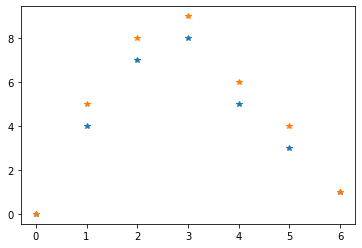

In [205]:
import matplotlib.pyplot as plt
import numpy as np
points=[[0,0],[4,5],[7,8],[8,9],[5,6],[3,4],[1,1]]

plt.plot(np.array(points),'*')


# 283. Move Zeroes
Easy
12.3K
308
Companies
Given an integer array nums, move all 0's to the end of it while maintaining the relative order of the non-zero elements.

Note that you must do this in-place without making a copy of the array.

 

Example 1:

Input: nums = [0,1,0,3,12]
Output: [1,3,12,0,0]
Example 2:

Input: nums = [0]
Output: [0]

In [199]:
def moveZeroes( nums= [0,1,0,3,12]):

    l=0

    for r in range(len(nums)):
        if nums[r]:
            nums[l],nums[r]=nums[r],nums[l]
            l+=1

    return nums

moveZeroes()

[1, 3, 12, 0, 0]

# 108. Convert Sorted Array to Binary Search Tree

Given an integer array nums where the elements are sorted in ascending order, convert it to a 
height-balanced
 binary search tree.

 

Example 1:


Input: nums = [-10,-3,0,5,9]
Output: [0,-3,9,-10,null,5]
Explanation: [0,-10,5,null,-3,null,9] is also accepted:

In [12]:
class TreeNode:
    def __init__(self,val=0,left=None,right=None):
        self.val=val
        self.left=left
        self.right=right
        
def arraytoTree(nums=[-10,-3,0,5,9]):
    l,r=0,len(nums)-1

    def makeTree(l,r):
        if l>r:
            return 
        mid=(l+r)//2
        root=TreeNode(nums[mid])
        root.left=makeTree(l,mid-1)
        root.right=makeTree(mid+1,r)
        return root

    return makeTree(l,r)

arraytoTree()

# 572. Subtree of Another Tree


Given the roots of two binary trees root and subRoot, return true if there is a subtree of root with the same structure and node values of subRoot and false otherwise.

A subtree of a binary tree tree is a tree that consists of a node in tree and all of this node's descendants. The tree tree could also be considered as a subtree of itself.

In [ ]:
class Solution(object):
    def isSubtree(self, root, subRoot):
        """
        :type root: TreeNode
        :type subRoot: TreeNode
        :rtype: bool
        """
        if not root:
            return False
        if not subRoot:
            return True
        
        def check_same(p,q):
            if not p and not q:
                return True
            if not p or not q or p.val != q.val:
                return False
            return check_same(p.left,q.left) and check_same(p.right,q.right)
        

        if check_same(root,subRoot):
            return True
        return self.isSubtree(root.left,subRoot) or self.isSubtree(root.right,subRoot)

# 57. Insert Interval

You are given an array of non-overlapping intervals intervals where intervals[i] = [starti, endi] represent the start and the end of the ith interval and intervals is sorted in ascending order by starti. You are also given an interval newInterval = [start, end] that represents the start and end of another interval.

Insert newInterval into intervals such that intervals is still sorted in ascending order by starti and intervals still does not have any overlapping intervals (merge overlapping intervals if necessary).

Return intervals after the insertion.

In [18]:
def insert(intervals = [[1,2],[3,5],[6,7],[8,10],[12,16]], newInterval = [4,8]):
    #binary search overlapping interval with the newInterval
    res=[]
    for i,v in enumerate(intervals):
        if newInterval[1]<v[0]:
            res.append(newInterval)
            return res+intervals[i:]
        
        elif v[1]<newInterval[0]:
            res.append(v)
            
        else:
            newInterval=[min(v[0],newInterval[0]),max(v[1],newInterval[1])]
    res.append(newInterval)
    return res

insert()

[[1, 2], [3, 10], [12, 16]]

# 973. K Closest Points to Origin

Given an array of points where points[i] = [xi, yi] represents a point on the X-Y plane and an integer k, return the k closest points to the origin (0, 0).

The distance between two points on the X-Y plane is the Euclidean distance (i.e., √(x1 - x2)2 + (y1 - y2)2).

You may return the answer in any order. The answer is guaranteed to be unique (except for the order that it is in).

In [23]:
# O(n)
from heapq import heapify,heappush,heappop
def kClosest( points=[[1,3],[-2,2]], k=1):
    dist,res=[],[]
    heapify(dist)

    for x,y in points:
        heappush(dist,[x**2+y**2,x,y])

    for i in range(k):
        res.append(heappop(dist)[1:])

    return res

kClosest()

[[-2, 2]]

In [32]:
def canFinish( numCourses=2, prerequisites=[[0,1],[1,0]]):
    """
    :type numCourses: int
    :type prerequisites: List[List[int]]
    :rtype: bool
    """
    dic={i:[] for i in range(numCourses)}
    crsStatus=[0]*numCourses #0: not visited, 1: is processing, 2: processed

    for crs,pre in prerequisites:
        dic[crs].append(pre)
    #print(dic,crsStatus)

    def dfs(crs):
        if dic[crs]==[]:
            return True
        if crsStatus[crs]==1:
            return False
        crsStatus[crs]=1

        for pre in dic[crs]:
            if not dfs(pre):
                return False
            dic[crs].remove(pre)
        crsStatus[crs]=2
        return True

    return dfs(0)

canFinish()

False

# Implement Trie (Prefix Tree)

A trie (pronounced as "try") or prefix tree is a tree data structure used to efficiently store and retrieve keys in a dataset of strings. There are various applications of this data structure, such as autocomplete and spellchecker.

Implement the Trie class:

Trie() Initializes the trie object.
void insert(String word) Inserts the string word into the trie.
boolean search(String word) Returns true if the string word is in the trie (i.e., was inserted before), and false otherwise.
boolean startsWith(String prefix) Returns true if there is a previously inserted string word that has the prefix prefix, and false otherwise.Prefic Trees (Tri)

In [51]:
class triNode:
    def __init__(self):
        self.children={}
        self.isend=False

class Trie(object):

    def __init__(self):
        self.head=triNode()
    
    def insert(self, word):
        cur=self.head
        for ch in word:
            if not ch in cur.children:
                cur.children[ch]=triNode()
            cur=cur.children[ch]         
        cur.isend=True
        

    def search(self, word): 
        cur=self.head
        for ch in word:
            if not ch in cur.children:
                return False
            cur=cur.children[ch]
        return cur.isend
              

    def startsWith(self, prefix):

        cur=self.head
        for ch in prefix:
            if not ch in cur.children:
                return False
            cur=cur.children[ch]
        return True
        


# Your Trie object will be instantiated and called as such:
obj = Trie()
obj.insert('apple')
print(obj.search('fruit'))
print(obj.startsWith('app'))

txt='A trie ( pronounced as try ) or prefix tree is a tree data structure used to efficiently store and retrieve keys in a dataset of strings. There are various applications of this data structure, such as autocomplete and spellchecker.'
txt=txt.split(' ')

for word in txt:
    obj.insert(word)
    
obj.startsWith('tz')

False
True


False

# Check Monotone:
    

In [67]:
def checkMonotone(s='01110'):
    state=0
    i=0
    while i<len(s) and state==0:
        if s[i]=='1':
            state=1
            break
        i+=1

    while i<len(s) and state==1:
        if s[i]=='0':
            return False
        i+=1
    return i==len(s)

checkMonotone()
    

False

# Flip String to Monotone Increasing

A binary string is monotone increasing if it consists of some number of 0's (possibly none), followed by some number of 1's (also possibly none).

You are given a binary string s. You can flip s[i] changing it from 0 to 1 or from 1 to 0.

Return the minimum number of flips to make s monotone increasing.

 

Example 1:

Input: s = "00110"
Output: 1
Explanation: We flip the last digit to get 00111.

In [73]:
def minFlipsMonoIncr( s="00110"):
    cntOne=0
    res=0

    for ch in s:
        if ch=='1':
            cntOne+=1
        else:
            res=min(res+1,cntOne)
    return res

minFlipsMonoIncr()

1

# 918. Maximum Sum Circular Subarray
Given a circular integer array nums of length n, return the maximum possible sum of a non-empty subarray of nums.

A circular array means the end of the array connects to the beginning of the array. Formally, the next element of nums[i] is nums[(i + 1) % n] and the previous element of nums[i] is nums[(i - 1 + n) % n].

A subarray may only include each element of the fixed buffer nums at most once. Formally, for a subarray nums[i], nums[i + 1], ..., nums[j], there does not exist i <= k1, k2 <= j with k1 % n == k2 % n.

In [75]:
def maxSubarraySumCircular(nums=[-5,3,5]):
    curmax=totmax=curmin=totmin=totsum=nums[0]
    for i in range(1,len(nums)):
        curmax=max(nums[i]+curmax,nums[i])
        curmin=min(nums[i]+curmin,nums[i])

        totmax=max(totmax,curmax)
        totmin=min(totmin,curmin)
        totsum+=nums[i]

    return totmax if totmax<0 else max(totmax,totsum-totmin)

maxSubarraySumCircular()

8

# 239. Sliding Window Maximum
Hard

You are given an array of integers nums, there is a sliding window of size k which is moving from the very left of the array to the very right. You can only see the k numbers in the window. Each time the sliding window moves right by one position.

Return the max sliding window.

 

Example 1:

Input: nums = [1,3,-1,-3,5,3,6,7], k = 3
Output: [3,3,5,5,6,7]

In [78]:
from collections import deque 

def maxSlidingWindow( nums = [1,3,-1,-3,5,3,6,7], k = 3 ):
    res=[]
    q=deque()
    l=r=0

    while r<len(nums):
        #remove smaller items from q before adding to make q always decreasing
        while q and nums[q[-1]]<nums[r]:
            q.pop()
        q.append(r)

        #check for window left bound
        if l>q[0]:
            q.popleft()

        if (r+1)>=k:
            res.append(nums[q[0]])
            l+=1
        r+=1
    return res

maxSlidingWindow()

[3, 3, 5, 5, 6, 7]

In [30]:
from collections import deque


def find_max_sliding_window(nums= [1,3,-1,-3,5,3,6,7], window_size=3):
    result = []
    window = deque()
    
    if window_size > len(nums):
        window_size = len(nums)
    for i in range(window_size):
        while window and nums[i] >= nums[window[-1]]:
            window.pop()
        window.append(i)
    result.append(nums[window[0]])
    for i in range(window_size, len(nums)):
        while window and nums[i] >= nums[window[-1]]:
            window.pop()
        if window and window[0] <= (i - window_size):
            window.popleft()
        window.append(i)
        result.append(nums[window[0]])
    return result

find_max_sliding_window()

[3, 3, 5, 5, 6, 7]

# 155. Min Stack

Design a stack that supports push, pop, top, and retrieving the minimum element in constant time.

Implement the MinStack class:

MinStack() initializes the stack object.
void push(int val) pushes the element val onto the stack.
void pop() removes the element on the top of the stack.
int top() gets the top element of the stack.
int getMin() retrieves the minimum element in the stack.
You must implement a solution with O(1) time complexity for each function.

In [79]:
class MinStack(object):

    def __init__(self):
        self.stk=[]
        self.minstk=[]
        
    def push(self, val):
        self.stk.append(val) 
        self.minstk.append( val if not self.minstk else min(val, self.minstk[-1]) )
            
        
    def pop(self):
        if not self.stk:
            return 
        self.stk.pop()
        self.minstk.pop()

    def top(self):
        if not self.stk:
            return 
        return self.stk[-1]
        

    def getMin(self):
        if self.minstk:
            return 
        return self.minstk[-1]

# Non decreasing sub sequeneces of an array491. Non-decreasing Subsequences

Given an integer array nums, return all the different possible non-decreasing subsequences of the given array with at least two elements. You may return the answer in any order.

 

Example 1:

Input: nums = [4,6,7,7]
Output: [[4,6],[4,6,7],[4,6,7,7],[4,7],[4,7,7],[6,7],[6,7,7],[7,7]]

In [129]:
def findSubsequences( nums=[4,6,7,7]):
    """
    :type nums: List[int]
    :rtype: List[List[int]]
    """
    res=set()

    def bt(i,subseq):
        if  len(subseq)>1:
            res.add(tuple(subseq))

        if i==len(nums):
            return

        if  not subseq or nums[i]>=subseq[-1]:
            bt(i+1,subseq+[nums[i]])
        bt(i+1,subseq)

    bt(0,[])
    return res

findSubsequences()

{(4, 6), (4, 6, 7), (4, 6, 7, 7), (4, 7), (4, 7, 7), (6, 7), (6, 7, 7), (7, 7)}

# 2023 ^

# 2022 >

### 1.Two Sum

In [10]:
def two_sum(nums,target):
    n=len(nums)
    dict_pairs={}
    for i in range (n):
        if not nums[i] in dict_pairs:
            dict_pairs[target-nums[i]]=i
        else:
            return (dict_pairs[nums[i]],i)
    return -1

nums=[1,2,3,4]
two_sum(nums,5)

(1, 2)

In [20]:
def threeSum(nums=[2,1,-4,-3,5,6],target=0):
    
    res=[]
    for j in range (len(nums)):
        rem=target-nums[j]
        dic ={}
        for i in range (j,len(nums)):
            if j!=i:
                if nums[i] not in dic :
                    dic[rem-nums[i]]=i
                else:
                    res.append(( dic[nums[i]],i,j))
    return res

threeSum()

[(1, 3, 0)]

## 3. Best Time to Buy and Sell Stock

You are given an array prices where prices[i] is the price of a given stock on the ith day.
You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.
Return the maximum profit you can achieve from this transaction. If you cannot achieve any profit, return 0.
Example 1:

Input: prices = [7,1,5,3,6,4]
Output: 5
Explanation: Buy on day 2 (price = 1) and sell on day 5 (price = 6), profit = 6-1 = 5.
Note that buying on day 2 and selling on day 1 is not allowed because you must buy before you sell.

In [30]:
def maxProfit(prices=[7,1,5,3,6,4] ):
    l,r=0,1
    n=len(prices)
    max_p=0
    while r<n:
        if prices[l]<prices[r]:
            profit=prices[r]-prices[l]
            max_p=max(profit,max_p)
        else:
            l=l+1
        r+=1
    return max_p

maxProfit()

5

## 4. Contains Duplicate

Given an integer array nums, return true if any value appears at least twice in the array, and return false if every element is distinct.
Example 1:

Input: nums = [1,2,3,1]
Output: true

In [20]:
def check_duplicate(nums=[1,2,3,1]):
    n=len(nums)
    numSet=set()
    for i in range(n):
        if nums[i] in numSet:
            return True
        else:
            numSet.add(nums[i])
    return False

check_duplicate()

True

### 5.Product of Array Except Self

Given an integer array nums, return an array answer such that answer[i] is equal to the product of all the elements of nums except nums[i].

The product of any prefix or suffix of nums is guaranteed to fit in a 32-bit integer.

You must write an algorithm that runs in O(n) time and without using the division operation.



In [32]:
def prod_except_self(nums=[5,2,3,4]):
    prodAll=1
    n=len(nums)
    ans=[0]*n
    for i in  range(n):
        prodAll*=nums[i]
    for i in range(n):
        ans[i]=prodAll/nums[i]
    return ans



def prod_except_self2(nums=[5,2,3,4]):
    n=len(nums)
    ans=[0]*n
    prefix=1
    
    for i in range(n):
        ans[i]=prefix
        prefix*=nums[i]
    print(ans)
        
    postfix=1
    for i in range(n-1,-1,-1):
        ans[i]*=postfix
        postfix*=nums[i]
        print(i,ans[i])
    return ans

def product_except_slef3(nums=[5,2,3,4]):
    n=len(nums)
    prefix=[1]*n
    postfix=[1]*n
    res=[0]*n
    prefix[0]=nums[0]
    postfix[n-1]=nums[n-1]
    
    for i in range(1,n):
        prefix[i]=prefix[i-1]*nums[i]
    for i in range(n-2,-1,-1):
        postfix[i]=postfix[i+1]*nums[i]
    for i in range(n):
        res[i]=(prefix[i-1] if i!=0 else 1) * (postfix[i+1] if i!=n-1 else 1)
    return res
        
    

print(prod_except_self2(),product_except_slef3())
        

[1, 5, 10, 30]
3 30
2 40
1 60
0 24
[24, 60, 40, 30] [24, 60, 40, 30]


# Maximum Subarray

Given an integer array nums, find the contiguous subarray (containing at least one number) which has the largest sum and return its sum.

A subarray is a contiguous part of an array.
Example 1:

Input: nums = [-2,1,-3,4,-1,2,1,-5,4]
Output: 6
Explanation: [4,-1,2,1] has the largest sum = 6.

In [30]:
def maxSubArray(nums=[-2,1,-3,4,-1,2,1,-5,4]):
    curSum=maxSum=nums[0]
    n=len(nums)
    for i in range(1,n):
        curSum=max(nums[i],nums[i]+curSum)
        maxSum=max(curSum,maxSum)
    return maxSum

maxSubArray()

6

# Valid Paranteces 

Given a string s containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input string is valid.

An input string is valid if:

Open brackets must be closed by the same type of brackets.
Open brackets must be closed in the correct order.
 

Example 1:

Input: s = "()"
Output: true
Example 2:

Input: s = "()[]{}"
Output: true

In [73]:
def validParanteces(s=')'):
    stk=[]
    char_dict={'(':')','[':']','{':'}'}
    for ch in s:
        if ch in char_dict:
            stk.append(char_dict[ch])
        elif stk and ch == stk[-1]:
            stk.pop()
        else:
            return False
        print(stk)
    if stk==[]:
        return True
    else :
        return False
    
    
validParanteces()

False

# Valid Palindrome

In [124]:
def valiPalindrome(s='aa aa,xaaa /"]a'):
    if len(s)<=1:
        return True
    else:
        s=[ch.lower() for ch in str(s) if ch.isalnum()]
        l,r=0,len(s)-1
        while l<r:
            if s[l]==s[r]:
                l+=1
                r-=1
            else:
                return False
        return True
    
valiPalindrome()

True

# Valid Anagram

Given two strings s and t, return true if t is an anagram of s, and false otherwise.

An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

Example 1:

Input: s = "anagram", t = "nagaram"
Output: true

In [36]:
def validAnagram(s="anagram",t="nagaram"):
    charDict={}
    n=len(s)
    m=len(t)
    if not n==m:
        return False
    charDict={}
    for i in range(n):
        charDict[s[i]]=charDict.get(s[i],0)+1
    for i in range(n):
        charDict[t[i]]=charDict.get(t[i],0)-1
    if not any(charDict.values())==0:
        return False
    return True

validAnagram()

True

# Check if a binary tree is balanced

Given a binary tree, determine if it is height-balanced.

For this problem, a height-balanced binary tree is defined as:

a binary tree in which the left and right subtrees of every node differ in height by no more than 1.

Example 1:
Input: root = [3,9,20,null,null,15,7]
Output: true


In [21]:
class treeNode:
    def __init__(self,val=0,left=None,right=None):
        self.val=val
        self.left=left
        self.right=right
        

In [22]:
def checkTreeBalanced(root):
    def dfs(root):
        if not root:
            return [True,0]
        left,right=dfs(root.left),dfs(root.right)
        balanced=left[0] and right[0] and abs(left[1]-right[1])<2
        return [balanced,1+max(left[1],right[1])]
    
    return dfs(root)[0],dfs(root)[1]

In [23]:
root=treeNode(10,treeNode(2),treeNode(30))
checkTreeBalanced(root)

(True, 2)

# Lowest Common Ancestor of a Binary Search Tree



Given a binary search tree (BST), find the lowest common ancestor (LCA) node of two given nodes in the BST.

According to the definition of LCA on Wikipedia: “The lowest common ancestor is defined between two nodes p and q as the lowest node in T that has both p and q as descendants (where we allow a node to be a descendant of itself).”


Example 1:

Input: root = [6,2,8,0,4,7,9,null,null,3,5], p = 2, q = 8
Output: 6
Explanation: The LCA of nodes 2 and 8 is 6.

In [34]:
def lca(root,p,q):
    if p==root or q==root:
        return root.val
    if root.val>p.val and root.val>q.val:
        return lca(root.left,p,q)
    if root.val<p.val and root.val<q.val:
        return lca(root.right,p,q)
    return root.val
lca(root,root.left,root.right)

10

### LCA in a non BST tree

In [92]:
def lca2( root, p, q):

    if not root:return 

    if root==p or root==q:
        return root

    left=self.lca2(root.left,p,q)
    right=self.lca2(root.right,p,q)
    if not left:
        return right
    if not right:
        return left

    return root

# Merge Two Sorted Lists

You are given the heads of two sorted linked lists list1 and list2.

Merge the two lists in a one sorted list. The list should be made by splicing together the nodes of the first two lists.

Return the head of the merged linked list. 

Example 1:

Input: list1 = [1,2,4], list2 = [1,3,5]
Output: [1,1,2,3,4,5]

In [32]:
class listNode:
    def __init__(self, val=0,next=None):
        self.val=val
        self.next=next
        
def printList(list1=listNode(1,listNode(2,listNode(4)))):
    cur=list1
    while cur:
        print(cur.val,end=' ')
        cur=cur.next
    
      
def mergeSortedLists(list1=listNode(1,listNode(2,listNode(4))),list2=listNode(1,listNode(3,listNode(5)))):
    dummyNode=listNode()
    cur=dummyNode
    p1=list1
    p2=list2
    while p1 and p2:
        if p1.val<p2.val:
            cur.next=p1
            p1=p1.next
        else:
            cur.next=p2
            p2=p2.next
        cur=cur.next
    if p1:
        cur.next=p1
    if p2:
        cur.next=p2
    return dummyNode.next


merged=mergeSortedLists()
printList(merged)

1 1 2 3 4 5 

# Linked list has cycle

In [33]:
def hasCycle(head):
    if not head or not head.next:
        return False
    slow=fast=head
    while fast and fast.next:
        slow=slow.next
        fast=fast.next.next
        if slow==fast:
            return True
    return False

n1= listNode(1)
n2=listNode(2)
n3=listNode(3)
n1.next=n2
n2.next=n3
n3.next=n1

hasCycle(n1)


True

# Flood Fill



An image is represented by an m x n integer grid image where image[i][j] represents the pixel value of the image.

You are also given three integers sr, sc, and color. You should perform a flood fill on the image starting from the pixel image[sr][sc].

To perform a flood fill, consider the starting pixel, plus any pixels connected 4-directionally to the starting pixel of the same color as the starting pixel, plus any pixels connected 4-directionally to those pixels (also with the same color), and so on. Replace the color of all of the aforementioned pixels with color.

Return the modified image after performing the flood fill.

Example 1:

Input: image = [[1,1,1],[1,1,0],[1,0,1]], sr = 1, sc = 1, color = 2
Output: [[2,2,2],[2,2,0],[2,0,1]]
Explanation: From the center of the image with position (sr, sc) = (1, 1) (i.e., the red pixel), all pixels connected by a path of the same color as the starting pixel (i.e., the blue pixels) are colored with the new color.
Note the bottom corner is not colored 2, because it is not 4-directionally connected to the starting pixel.

In [50]:
def floodFill(image=[[1,1,1],
                     [1,1,0],
                     [1,0,1]],sr=1,sc=1,color=2):
    rows,cols=len(image),len(image[0])
    oldColor=image[sr][sc]
    visited=set()
    dist=[(-1,0),(1,0),(0,-1),(0,1)]
    
    def dfs(r,c):
        if (r,c) in visited:return
        visited.add((r,c))
        for d in dist:
            x,y=r+d[0],c+d[1]
            if 0<=x<rows and 0<=y<cols and image[x][y]==oldColor:
                image[x][y]=color
                dfs(x,y)
            
        
    if oldColor!=color:
        image[sr][sc]=color
        dfs(sr,sc)
        return image

print("\n".join([''.join(str(r)) for r in floodFill()]))
 


[2, 2, 2]
[2, 2, 0]
[2, 0, 1]


In [ ]:
def floodFill(self, image, sr, sc, newColor):
        # time O(n^2) space O(n)
        # runtime: 90ms
        rows, cols = len(image), len(image[0])
        dir = ((-1,0),(1,0),(0,1),(0,-1))
        visited = set(); pixel = image[sr][sc] # store pixel value
        def dfs(i, j): 
            if (i,j) in visited: return
            visited.add((i,j)) 
            for d in dir: # traverse neighbors
                x, y = i+d[0], j+d[1] 
                if 0<= x < rows and 0<= y < cols and image[x][y] == pixel:
                    image[x][y] = newColor
                    dfs(x,y)
        if newColor != pixel: 
            image[sr][sc]=newColor
            dfs(sr, sc) 
        return image
# credit to dfs template
# https://discuss.leetcode.com/topic/66065/python-dfs-bests-85-tips-for-all-dfs-in-matrix-question

# Ransom Note

Given two strings ransomNote and magazine, return true if ransomNote can be constructed by using the letters from magazine and false otherwise.
Each letter in magazine can only be used once in ransomNote.
Example 1:

Input: ransomNote = "a", magazine = "b"
Output: false
Example 2:

Input: ransomNote = "aa", magazine = "ab"
Output: false
Example 3:

Input: ransomNote = "aa", magazine = "aab"
Output: true



In [36]:
#import collections
def canConstruct(ransom='cabcab',mag='aabbcc'):
    
    dicM={}

    for ch in mag:
        dicM[ch]=1+dicM.get(ch,0)

    for ch in ransom:
        if ch in dicM and dicM[ch]>0:
                dicM[ch]-=1
        else:
            return False
    return True
            
    
canConstruct()
    

True

# Staircase problem

 Climbing Stairs

You are climbing a staircase. It takes n steps to reach the top.

Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?

Example 1:

Input: n = 2
Output: 2
Explanation: There are two ways to climb to the top.
1. 1 step + 1 step
2. 2 steps

In [76]:
def stairs(n=20):
    ways=[0]*(n+1)
    ways[0]=1
    ways[1]=1
    for i in range(2,len(ways)):
        ways[i]=ways[i-1]+ways[i-2]
    return ways[n]
stairs()

10946

In [77]:
def stairsRec(n=20):
    if n<=1:
        return 1
    return stairsRec(n-1)+ stairsRec(n-2)

stairsRec()

10946

In [1]:
def starisRecMemo(n=20,knownways={}):
    if n<=1:
        return 1
    if n not in knownways:
        knownways[n]=starisRecMemo(n-1,knownways)+starisRecMemo(n-2,knownways)
    return  knownways[n]

starisRecMemo()

10946

# Longest Palindrome

Given a string s which consists of lowercase or uppercase letters, return the length of the longest palindrome that can be built with those letters.

Letters are case sensitive, for example, "Aa" is not considered a palindrome here.
Example 1:

Input: s = "abccccdd"
Output: 7
Explanation: One longest palindrome that can be built is "dccaccd", whose length is 7.
Example 2:

Input: s = "a"
Output: 1
Explanation: The longest palindrome that can be built is "a", whose length is 1.

In [2]:
def longestPalind(s='abccccdd'):
    dic={}
    for ch in s:
        dic[ch]=dic.get(ch,0)+1
    longest=0
    for k,v in dic.items():
        if v>1:
            longest+=v//2*2
            dic[k]-=v//2*2
    if 1 in dic.values():
        return longest+1
    return longest

longestPalind()

7

# Majority Element

In [44]:
# Runtime: 188 ms, faster than 65.42% of Python3 online submissions for Majority Element.
# Memory Usage: 15.5 MB, less than 81.81% of Python3 online submissions for Majority Element.

def majorityElement( nums=[1,1,1,2,3]):
    target, d = len(nums)//2, {i:0 for i in nums}
    for i in nums:
        d[i]+=1
        if d[i]>target:
            return i

            
def majorityElement_mine( nums=[1,1,1,2,3]):
    s=set(nums)
    #print(s)

    for item in s:
        cur_sum=0
        for num in nums:
            if num==item:
                cur_sum+=1
        if cur_sum>len(nums)//2:
            return item
        
majorityElement()


1

# Merge intervals

In [4]:
def mergeIntervals(intervals=[[1,6],[-5,8],[9,10]]):
    res=[]
    intervals=sorted(intervals,key=lambda x:x[0])
    #print(intervals)
    res=[]
    for v in intervals:
        if not res or v[0]>res[-1][1]: # first interval or no overlap
            res.append(v)
        else:                           # there is an overlap between current v and the last item in res
            res[-1][1]=max(res[-1][1],v[1])
    return res
        
mergeIntervals()

[[-5, 8], [9, 10]]

# Insert Interval


You are given an array of non-overlapping intervals intervals where intervals[i] = [starti, endi] represent the start and the end of the ith interval and intervals is sorted in ascending order by starti. You are also given an interval newInterval = [start, end] that represents the start and end of another interval.

Insert newInterval into intervals such that intervals is still sorted in ascending order by starti and intervals still does not have any overlapping intervals (merge overlapping intervals if necessary).

Return intervals after the insertion.

In [6]:
def insertInterval(intervals=[[10,15],[1,3],[6,9]], newint=[-2,7]):
    if not intervals:
        return [newint]
    res=[]
    intervals.append(newint)
    intervals=sorted(intervals,key=lambda x:x[0])
    for v in intervals:
        if not res or v[0]>res[-1][1]:
            res.append(v)
        else: #there is an overlap between v and the last elemet
            #res[-1][0]=min(res[-1][0],v[0])
            res[-1][1]=max(res[-1][1],v[1])                  
    return res

insertInterval()



[[-2, 9], [10, 15]]

# 01 Matrix

Given an m x n binary matrix mat, return the distance of the nearest 0 for each cell.

The distance between two adjacent cells is 1.
Input: mat = [[0,0,0],[0,1,0],[1,1,1]]
Output: [[0,0,0],[0,1,0],[1,2,1]]

In [2]:

def updateMatrix( matrix=[[0,0,1],
                          [1,1,1],
                          [1,1,1]]):
    """
    :type mat: List[List[int]]
    :rtype: List[List[int]]
    """
    h=len(matrix)
    w=len(matrix[0])
    #nighbors=[(-1,0),(1,0),(0,-1),(0,1)]
    q= []
    # first round: add coordinates (r,c) of 0 values to queue
    for i in range(h):
        for j in range(w):
            if matrix[i][j]==0:
                q.append((i,j))
            else:
                matrix[i][j]=float("inf")          
    # do BFS from 0 values to 1    
    for row,col in q:
        dist = matrix[row][col] + 1
        for dy, dx in  [(-1,0),(1,0),(0,-1),(0,1)]:
            r=row+dy
            c=col+dx
            if 0 <= r < h and 0 <= c < w and dist < matrix[r][c]:
                matrix[r][c]=dist
                q.append((r,c)) 
    return matrix

print("\n".join([''.join(str(r)) for r in updateMatrix()]))

[0, 0, 1]
[1, 1, 2]
[2, 2, 3]


# K Closest Points to Origin

Given an array of points where points[i] = [xi, yi] represents a point on the X-Y plane and an integer k, return the k closest points to the origin (0, 0).

The distance between two points on the X-Y plane is the Euclidean distance (i.e., √(x1 - x2)2 + (y1 - y2)2).

You may return the answer in any order. The answer is guaranteed to be unique (except for the order that it is in).

Input: points = [[1,3],[-2,2]], k = 1
Output: [[-2,2]]

In [12]:
from numpy import sqrt 
def kClosest( points= [[1,3],[-2,2],[5,5]], k=2):

    dist=[]
    for x,y in points:
        dist.append((sqrt(x*x+y*y),x,y))
        
    dist=sorted(dist,key=lambda x:x[0])
    print(dist)
    res= [[p1,p2] for d,p1,p2 in  dist]
    #print(res[:k])
    return res[:k]

kClosest()

[(2.8284271247461903, -2, 2), (3.1622776601683795, 1, 3), (7.0710678118654755, 5, 5)]


[[-2, 2], [1, 3]]

# Level order traversal of a tree (a version of BFS)

In [49]:
# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
from collections import deque

def levelOrder( root):
    """
    :type root: TreeNode
    :rtype: List[List[int]]
    """
    if not root:
        return []
    q=deque([root])
    res=[]
    while q:
        n=len(q)
        lvl=[]
        for i in range(n):
            node=q.popleft()
            lvl.append(node.val)
            if node.left:
                q.append(node.left)
            if node.right:
                q.append(node.right)

        res.append(lvl)
    return res

levelOrder( root=treeNode(               1,
                            treeNode(2,
                        treeNode(4),     treeNode(5)),          treeNode(20,
                                                               treeNode(50),     treeNode(40))))

[[1], [2, 20], [4, 5, 50, 40]]

In [21]:
#leet code approved solution
def lengthOfLongestSubstring( s='abcc'):
    l=r=0
    totM=0
    visited=set()
    while r<len(s):
        while s[r] in visited:
            visited.remove(s[l])
            l+=1
        visited.add(s[r])
        totM=max(totM,r-l+1)
        r+=1    
    return totM
lengthOfLongestSubstring()

3

# Evaluate Reverse Polish Notation



Evaluate the value of an arithmetic expression in Reverse Polish Notation.

Valid operators are +, -, *, and /. Each operand may be an integer or another expression.

Note that division between two integers should truncate toward zero.

It is guaranteed that the given RPN expression is always valid. That means the expression would always evaluate to a result, and there will not be any division by zero operation.

 

Example 1:

Input: tokens = ["2","1","+","3","*"]
Output: 9
Explanation: ((2 + 1) * 3) = 9

In [57]:
def evalRPN( tokens=["10","6","9","3","+","-11","*","/","*","17","+","5","+"]):
    """
    :type tokens: List[str]
    :rtype: int
    """
    stk=[]
    for t in tokens:
        if t not in '+/*-':
            stk.append(int(t))
        else:
            b=stk.pop()
            a=stk.pop()
            if t=='+': res=a+b
            elif t=='-': res=a-b
            elif t=='/': res=int(a/b)
            else:res=a*b
            stk.append(res)
    return stk[-1]

evalRPN()



22

# Course schedule

There are a total of numCourses courses you have to take, labeled from 0 to numCourses - 1. You are given an array prerequisites where prerequisites[i] = [ai, bi] indicates that you must take course bi first if you want to take course ai.

For example, the pair [0, 1], indicates that to take course 0 you have to first take course 1.
Return true if you can finish all courses. Otherwise, return false.

Example 1:

Input: numCourses = 2, prerequisites = [[1,0]]
Output: true
Explanation: There are a total of 2 courses to take. 
To take course 1 you should have finished course 0. So it is possible.
Example 2:

Input: numCourses = 2, prerequisites = [[1,0],[0,1]]
Output: false
Explanation: There are a total of 2 courses to take. 
To take course 1 you should have finished course 0, and to take course 0 you should also have finished course 1. So it is impossible.

In [7]:
    
def canFinish( numCourses=2, prerequisites=[[1,0],[0,1]]):
    preMap={i:[] for i in range(numCourses)}
    visited=[0]*numCourses  # 0-> not visited, 1->being visited, 2->completed
    for crs,pre in prerequisites:
        preMap[crs].append(pre)

    def dfs(crs):
        if visited[crs]==1:
            return False 
        if preMap[crs]==[]:
            return True
        visited[crs]=1
        for pre in preMap[crs]:
            if not dfs(pre):
                return False
            preMap[crs].remove(pre)
        visited[crs]=2
        return True

    for crs in range(numCourses):
        if visited[crs]==0 and not dfs(crs):return False
    return True

canFinish()        


False

# Coin Change


You are given an integer array coins representing coins of different denominations and an integer amount representing a total amount of money.

Return the fewest number of coins that you need to make up that amount. If that amount of money cannot be made up by any combination of the coins, return -1.

You may assume that you have an infinite number of each kind of coin.


Example 1:

Input: coins = [1,2,5], amount = 11
Output: 3
Explanation: 11 = 5 + 5 + 1

In [ ]:
def coinChange( coins, amount):

    dp=[amount+1]*(amount+1)
    dp[0]=0
    for i in range(1,len(dp)):
        for c in coins:
            if c<=i:
                #dp[i]+=dp[i-c] # all possible combinations
                dp[i]=min(dp[i],1+dp[i-c])
    #print(dp)
    return dp[amount] if dp[amount]!=amount+1 else-1


## Is valid BST (BFS (root,-inf,inf))

In [82]:
def isValidBST(self, root):

    if not root: 
        return True
    q=deque([(root,float('-inf'),float('inf'))])
    while q:
        node,low,high=q.popleft()
        if node.val<=low or node.val>=high:
            return False
        if node.left:
            q.append((node.left,low,node.val))
        if node.right:
            q.append((node.right,node.val,high))
    return True

# Rotting Oranges


You are given an m x n grid where each cell can have one of three values:

0 representing an empty cell,
1 representing a fresh orange, or
2 representing a rotten orange.
Every minute, any fresh orange that is 4-directionally adjacent to a rotten orange becomes rotten.

Return the minimum number of minutes that must elapse until no cell has a fresh orange. If this is impossible, return -1.



In [84]:
def orangesRotting( grid=[[2,1,1],[1,1,0],[0,1,1]]):
    visited=set()
    rows,cols=len(grid),len(grid[0])
    time,fresh=0,0
    q=deque([])

    for i in range(rows):
        for j in range(cols):
            if grid[i][j]==1:
                fresh+=1
            elif grid[i][j]==2:
                q.append((i,j))

    while q and fresh>0:
        for k in range(len(q)):
            i,j=q.popleft()
            for di,dj in [(-1,0),(1,0),(0,-1),(0,1)]:
                x,y=i+di,j+dj
                if 0<=x<rows and 0<=y<cols and grid[x][y]==1:
                    grid[x][y]=2
                    fresh-=1
                    q.append((x,y))
        time+=1
    return time if fresh==0 else -1

orangesRotting()

4

# Permuteations of a list

In [124]:
def permute( nums=[1,2,3]):
    path=[]
    res=[]
    def perms_(nums,path,res):
        if not nums:
            res.append(path)

        for i in range (len(nums)):
            perms_(nums[:i]+nums[i+1:],[nums[i]]+path,res)
        return res

    return perms_(nums,path,res)

def permuteSubseq(nums=[1,2,3]):
    res=set()
    
    def perms_(i,path):
        if path:
            res.add(tuple(path))
            
        if i==len(nums):
            return
        
        perms_(i+1,path+[nums[i]])
        perms_(i+1,path)
        
    perms_(0,[])

    return res

print(permute())
print(permuteSubseq())

[[3, 2, 1], [2, 3, 1], [3, 1, 2], [1, 3, 2], [2, 1, 3], [1, 2, 3]]
{(1, 2), (2,), (1, 2, 3), (2, 3), (1,), (3,), (1, 3)}


# Combination Sum

In [123]:
def combinationSum( candidates=[2,3,6,7], target=7):
    res=[]
    path=[]

    def perm(cand,path,target):
        if target<0: return
        if target==0: 
            res.append(path)
            #print(res,path)
        for i in range (len(cand)):
            #print(i,cand[i],path)
            perm(cand,path+[cand[i]],target-cand[i])
             
        return res

    return perm(candidates,path,target)

print(combinationSum())


[[2, 2, 3], [2, 3, 2], [3, 2, 2], [7]]


In [84]:
#more accurate solution using 2 decisions ( two dfs running)
def combinationSum( candidates=[2,3,6,7], target=7 )  :

    res,path=[],[]

    def perm(i,path,total):
        if total==target: 
            res.append(path.copy())
            return
        if total>target or i>=len(candidates): 
            return
        path.append(candidates[i])
        perm(i,path,candidates[i]+total)
        path.pop()
        perm(i+1,path,total)

        return res

    return perm(0,path,0)

combinationSum()

[[2, 2, 3], [7]]

# Account Merge

Given a list of accounts where each element accounts[i] is a list of strings, where the first element accounts[i][0] is a name, and the rest of the elements are emails representing emails of the account.

Now, we would like to merge these accounts. Two accounts definitely belong to the same person if there is some common email to both accounts. Note that even if two accounts have the same name, they may belong to different people as people could have the same name. A person can have any number of accounts initially, but all of their accounts definitely have the same name.

After merging the accounts, return the accounts in the following format: the first element of each account is the name, and the rest of the elements are emails in sorted order. The accounts themselves can be returned in any order.

 

Example 1:

Input: accounts = [["John","johnsmith@mail.com","john_newyork@mail.com"],["John","johnsmith@mail.com","john00@mail.com"],["Mary","mary@mail.com"],["John","johnnybravo@mail.com"]]
Output: [["John","john00@mail.com","john_newyork@mail.com","johnsmith@mail.com"],["Mary","mary@mail.com"],["John","johnnybravo@mail.com"]]
Explanation:
The first and second John's are the same person as they have the common email "johnsmith@mail.com".
The third John and Mary are different people as none of their email addresses are used by other accounts.
We could return these lists in any order, for example the answer [['Mary', 'mary@mail.com'], ['John', 'johnnybravo@mail.com'], 
['John', 'john00@mail.com', 'john_newyork@mail.com', 'johnsmith@mail.com']] would still be accepted.

In [131]:
import collections
def accountsMerge(accounts = [["John","johnsmith@mail.com","john_newyork@mail.com"],
                              ["John","johnsmith@mail.com","john00@mail.com"],
                              ["Mary","mary@mail.com"],
                              ["John","johnnybravo@mail.com"]] ):
    res=[]
    temp_res=[]
    graph=collections.defaultdict(set)#{:set([])}
    visited=set([])

    email_name={}

    for acc in accounts:
        name=acc[0]

        for email in acc[1:]:
            graph[acc[1]].add(email)
            graph[email].add(acc[1])
            
            email_name[email]=name

    def dfs(email):
        if email in visited: return 
        visited.add(email)
        temp_res.append(email)
        for adj in graph[email]:
            dfs(adj)

    for email in graph:
        if email not in visited:
            dfs(email)
            res.append([email_name[email]]+sorted(temp_res))
            temp_res=[]
    return res

accountsMerge()

[['John', 'john00@mail.com', 'john_newyork@mail.com', 'johnsmith@mail.com'],
 ['Mary', 'mary@mail.com'],
 ['John', 'johnnybravo@mail.com']]

# Unique paths

There is a robot on an m x n grid. The robot is initially located at the top-left corner (i.e., grid[0][0]). The robot tries to move to the bottom-right corner (i.e., grid[m - 1][n - 1]). The robot can only move either down or right at any point in time.

Given the two integers m and n, return the number of possible unique paths that the robot can take to reach the bottom-right corner.

The test cases are generated so that the answer will be less than or equal to 2 * 109.

Example 1:


Input: m = 3, n = 7
Output: 28

In [159]:
def uniquePaths(m=4, n=4):

    path=[]
    res=[]
    if m==1 and n==1:
        return 1
    def move(r,c,path):
        if (r>=m and c<n) or (c>=n and r<m): return
        if r==m-1 and c==n-1:
            res.append(path)
            
        move(r+1,c,path+['D'])
        move(r,c+1,path+['R'])
        #print(res)
        return res
    
    final=move(0,0,path)
    print(len(final),final)
     

uniquePaths()

20 [['D', 'D', 'D', 'R', 'R', 'R'], ['D', 'D', 'R', 'D', 'R', 'R'], ['D', 'D', 'R', 'R', 'D', 'R'], ['D', 'D', 'R', 'R', 'R', 'D'], ['D', 'R', 'D', 'D', 'R', 'R'], ['D', 'R', 'D', 'R', 'D', 'R'], ['D', 'R', 'D', 'R', 'R', 'D'], ['D', 'R', 'R', 'D', 'D', 'R'], ['D', 'R', 'R', 'D', 'R', 'D'], ['D', 'R', 'R', 'R', 'D', 'D'], ['R', 'D', 'D', 'D', 'R', 'R'], ['R', 'D', 'D', 'R', 'D', 'R'], ['R', 'D', 'D', 'R', 'R', 'D'], ['R', 'D', 'R', 'D', 'D', 'R'], ['R', 'D', 'R', 'D', 'R', 'D'], ['R', 'D', 'R', 'R', 'D', 'D'], ['R', 'R', 'D', 'D', 'D', 'R'], ['R', 'R', 'D', 'D', 'R', 'D'], ['R', 'R', 'D', 'R', 'D', 'D'], ['R', 'R', 'R', 'D', 'D', 'D']]


In [165]:
#dp solution

def uniquePaths(m=3,n=3):
    dp=[[0 for _ in range(n)] for _ in range(m)]

    def solve(i,j):
        if i==m-1 or j==n-1:
            return 1
        if dp[i][j]!=0:
            return dp[i][j]
        dp[i][j]=solve(i+1,j)+solve(i,j+1)
        print(dp)
        return dp[i][j]

    return solve(0,0)

uniquePaths()

[[0, 0, 0], [0, 2, 0], [0, 0, 0]]
[[0, 0, 0], [3, 2, 0], [0, 0, 0]]
[[0, 3, 0], [3, 2, 0], [0, 0, 0]]
[[6, 3, 0], [3, 2, 0], [0, 0, 0]]


6

# Can_segment

In [179]:
def wordBreak(s="aaaaaaaaaaaaaaab"
, wordDict=["a","aa","aaa","aaaa","aaaaa","aaaaaa","aaaaaaa","aaaaaaaa","aaaaaaaaa","aaaaaaaaaa"]):

    if len(s)==1:
        if s in wordDict:
            return True
        else:
            return False

    def can_segment(s):
        n=len(s)

        for i in range(n+1):
            l=s[:i]
            if  l in wordDict:
                r=s[i:]
                if r in wordDict or not r or  can_segment(r):
                    return True
        return False

    return can_segment(s)

wordBreak()

False

# DP correct solution for word break (can segment)

In [178]:
def wordBreak(s='leetcodeappleleetapple',
              wordDict=["leet","code",'apple']):
    n=len(s)
    dp=[False]*(n+1)
    dp[n]=True

    for i in range(n-1,-1,-1):
        for w in wordDict:
            if s[i:i+len(w)]==w and i+len(w)<=n:
                dp[i]=dp[i+len(w)]
            if dp[i]:
                break
    return dp[0]

wordBreak()

True

# Prtition equal subset sum (Can partition array)

In [202]:
def canPartition( nums=[1,5,11,5]):
    n=(2**len(nums))
    res=[]
    rescomp=[]
    for i in range(1,n):
        s=set()
        for j in range(len(nums)):
            if i&(1<<j):
                s.add(j)
        res.append(list(s))
        rescomp.append([c for c in range(len(nums)) if c not in s])
        
        #if 
    for i in range(1,n-1):
        p1=p2=0
        for j in range(len(res[i])):
            p1+=nums[res[i][j]]
        for j in range(len(rescomp[i])):
            p2+=nums[rescomp[i][j]]
        if p1==p2:
            return True
            
    return res,rescomp

canPartition()


True

In [206]:
def canPartition(nums=[1,5,11,5]):
    target=sum(nums)//2
    if sum(nums)%2==1:
        return False
    dp=set({0})
    #dp.add(0)

    for i in range(len(nums)-1,-1,-1):
        nextdp=set()
        for t in dp:
            nextdp.add(t+nums[i])
            nextdp.add(t)
        dp=nextdp
        print(dp)
    return True if target in dp else False

canPartition()

{0, 5}
{0, 16, 11, 5}
{0, 5, 10, 11, 16, 21}
{0, 1, 5, 6, 10, 11, 12, 16, 17, 21, 22}


True

In [89]:
i=3
bin(i).count('1')

2

# Longest Palindrome substring

In [218]:
def longestPalindrome( s='abxcvc'):

    res=''
    lenRes=0

    for i in range(len(s)):
        #Odd length palidromes: strat from each ch and expand outward to the left and right
        l,r=i,i
        while l>=0 and r<len(s) and s[l]==s[r]: 
            if (r-l+1)>lenRes:
                res=s[l:r+1]
                lenRes=(r-l+1)
            l-=1
            r+=1

       #Even length palidromes: strat from each ch and expand outward to the left and right
        l,r=i,i+1
        while l>=0 and r<len(s) and s[l]==s[r]: 
            if (r-l+1)>lenRes:
                res=s[l:r+1]
                lenRes=(r-l+1)
            l-=1
            r+=1

    return res

longestPalindrome()

'cvc'

# Construct Binary Tree from Preorder and Inorder Traversal


Given two integer arrays preorder and inorder where preorder is the preorder traversal of a binary tree and inorder is the inorder traversal of the same tree, construct and return the binary tree.
Example 1:
Input: preorder = [3,9,20,15,7], inorder = [9,3,15,20,7]
Output: [3,9,20,null,null,15,7]
Example 2:

Input: preorder = [-1], inorder = [-1]
Output: [-1]
 

In [220]:
def buildTree( preorder, inorder):


    def build(preorder,inorder):
        if not preorder or not inorder: return 
        root=TreeNode(preorder[0])
        mid=inorder.index(preorder[0])
        root.left=build(preorder[1:mid+1],inorder[:mid])
        root.right=build(preorder[mid+1:],inorder[mid+1:])
        return root

    return build(preorder,inorder)

# Container with most Water

You are given an integer array height of length n. There are n vertical lines drawn such that the two endpoints of the ith line are (i, 0) and (i, height[i]).

Find two lines that together with the x-axis form a container, such that the container contains the most water.

Return the maximum amount of water a container can store.
nput: height = [1,8,6,2,5,4,8,3,7]
Output: 49
Explanation: The above vertical lines are represented by array [1,8,6,2,5,4,8,3,7]. In this case, the max area of water (blue section) the container can contain is 49.

In [223]:
def maxArea( height=[1,8,6,2,5,4,8,3,7]):

    l,r=0,len(height)-1
    totMax=0

    while l<r:
        curMax=(r-l)*min(height[l],height[r])
        if curMax>totMax:
            totMax=curMax
        if height[l]>height[r]:
            r-=1
        else:
            l+=1
    return totMax

maxArea()

49

# Letter combinations

In [241]:
def letterCombinations( digits='234'):
    
    dic={'2':'abc','3':'def','4':'ghi','5':'jkl'}
    res=[]
    path=''

    def combine(digits,path):
        if not len(digits):
            res.append(path)
            return

        pre=dic[digits[0]]
        for ch in pre:
            combine(digits[1:],path+ch)
            
        return res
                       
    return  combine(digits,path)
                       
letterCombinations()

['adg',
 'adh',
 'adi',
 'aeg',
 'aeh',
 'aei',
 'afg',
 'afh',
 'afi',
 'bdg',
 'bdh',
 'bdi',
 'beg',
 'beh',
 'bei',
 'bfg',
 'bfh',
 'bfi',
 'cdg',
 'cdh',
 'cdi',
 'ceg',
 'ceh',
 'cei',
 'cfg',
 'cfh',
 'cfi']

# Word Search

Given an m x n grid of characters board and a string word, return true if word exists in the grid.

The word can be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once.



In [252]:
def wordSearch(board = [["A","B","C","E"],
                        ["S","F","C","S"],
                        ["A","D","E","E"]], word = "ADFC"):
    rows,cols=len(board),len(board[0])
    visited=set()
    
    def dfs(r,c,i):
        if i==len(word):return True
        if r<0 or r>=rows or c<0 or c>=cols or board[r][c]!=word[i] or (r,c) in visited:
            return False
        visited.add((r,c))
        res=dfs(r+1,c,i+1) or dfs(r-1,c,i+1) or dfs(r,c+1,i+1) or dfs(r,c-1,i+1)
        visited.remove((r,c))
        return res
    
    for r in range(rows):
        for c in range(cols):
            if dfs(r,c,0):
                return True
    return False

wordSearch()

True

In [8]:
# Sort an array in which each element is off its sorted position by at most k positions

# input:  A = [10, 40, 50, 20, 30], k = 2

# output: [10, 20, 30, 40, 50]

#i=0,k=2,j:0-2-> 

# inp=[10, 40, 50, 20, 30]
# res=[10,20,30,40,50]
#heap:[40,50]
class MinHeap:
    def push(x):pass
    def pop():pass

def sort(A,k):
    heap=MinHeap()
    res=[]

    #push first k elements with O(log k)
    for j in range(k):
            heap.push(A[j])

    for i in range(k,len(A)):
        res.append(heap.pop())
        heap.push(A[i])

    while heap: # if still there are remaining elements in the heap
        res.append(heap.pop())
        
    return res

# Binary tree height

In [81]:
# height at each root= 1+max(height of the left sub tree + height of the right sub tree)
class treeNode:
    def __init__(self,val=0,left=None,right=None):
        self.val=val
        self.left=left
        self.right=right

root=treeNode(1,treeNode(2,treeNode(4)),treeNode(3,treeNode(5)))

def treeDiam(root=root):
    diam=0
    def treeHieght(root=root):
        nonlocal diam
        if not root:
            return -1
        leftH=treeHieght(root.left)
        rightH=treeHieght(root.right)
        diam=max(diam,2+leftH+rightH)
        return 1+max(leftH,rightH)
    
    treeHieght(root)
    return diam
treeDiam()
#treeHieght()

4

# Minimum Height Trees


A tree is an undirected graph in which any two vertices are connected by exactly one path. In other words, any connected graph without simple cycles is a tree.

Given a tree of n nodes labelled from 0 to n - 1, and an array of n - 1 edges where edges[i] = [ai, bi] indicates that there is an undirected edge between the two nodes ai and bi in the tree, you can choose any node of the tree as the root. When you select a node x as the root, the result tree has height h. Among all possible rooted trees, those with minimum height (i.e. min(h))  are called minimum height trees (MHTs).

Return a list of all MHTs' root labels. You can return the answer in any order.

The height of a rooted tree is the number of edges on the longest downward path between the root and a leaf.

 

In [40]:

def findMinHeightTrees(n = 4, edges = [[1,0],[1,2],[1,3]]):
    """
    :type n: int
    :type edges: List[List[int]]
    :rtype: List[int]
    """
    res=[]
    graph={node:[] for node in range(n)}
    for src,dst in edges:
        graph[src].append(dst)
        graph[dst].append(src)
    print(graph)
    visited=set()

    def dfs(root,starting):
        if  len(graph[root])==1 and root!=starting: return 0
        if  root in visited: return 0
        visited.add(root)
        maxD=1
        for child in graph[root]:
                maxD=max(maxD,1+dfs(child,starting))   
        return maxD
    
    def bfs(root,starting):
        if  len(graph[root])==1 and root!=starting : return 0
        if root in visited:return 0
        q=deque([root])
        h=0
        while q:
            n=len(q)
            for i in range(n):
                node=q.popleft()
                visited.add(node)
                for child in graph[node]:
                    if not child in visited:
                        visited.add(child)
                        q.append(child)
            h+=1
        return h-1
                        



    for root in range(n):
        if not root in visited:
            res.append([root,dfs(root,root)])
        visited.clear()

    Heights=[h for [r,h] in res]
    mht=[r for [r,h] in res if h==min(Heights)]
    #print(res,Heights,mht)
    return mht

findMinHeightTrees()


{0: [1], 1: [0, 2, 3], 2: [1], 3: [1]}


[1]

In [44]:
def findMinHeightTrees(n = 4, edges = [[1,0],[1,2],[1,3]]):
    if n<=2:
        return [i for i in range(n)]
    res=[]
    leaves=[]
    graph={node:set([]) for node in range(n)}
    for src,dst in edges:
        graph[src].add(dst)
        graph[dst].add(src)


    for i in range(n):
        if len(graph[i])==1:
            leaves.append(i)

    remaining_nodes=n
    while remaining_nodes>2:
        remaining_nodes-=len(leaves)
        new_leaves=[]
        while leaves:
            leaf=leaves.pop()
            neighbor=graph[leaf].pop()
            graph[neighbor].remove(leaf)
            if len(graph[neighbor])==1:
                new_leaves.append(neighbor)
        leaves=new_leaves
    return leaves

findMinHeightTrees()

[1]

# Binary Tree right side view

In [1]:
def rightSideView( root):

    res=[]

    def bfs_level(root):
        if not root:return 
        q=deque([root])
        res.append(q[-1].val)

        while q:
            n=len(q)

            for i in range(n):
                node=q.popleft()
                if node.left:
                    q.append(node.left)
                if  node.right:
                    q.append(node.right)


            if len(q)>0:
                res.append(q[-1].val)

        return res

    return bfs_level(root)

# Letter combinations of a phone number

In [3]:
def letterCombinations( digits='23'):
   
    dic={'2':'abc','3':'def','4':'ghi','5':'jkl','6':'mno','7':'pqrs','8':'tuv','9':'wxyz'}
    res=[]
    path=''

    def combine(digits,path):
        if not len(digits):
            res.append(path)
            return

        pre=dic[digits[0]]
        for ch in pre:
            combine(digits[1:],path+ch)          
        return res

    return combine(digits,path)

letterCombinations()

['ad', 'ae', 'af', 'bd', 'be', 'bf', 'cd', 'ce', 'cf']

# Task scheduler

In [46]:
import heapq
from collections import  deque

def taskscheduler( tasks=["A","A","A","B","B",'C'], n = 1):
    
    dic={task:0 for task in tasks}

    for task in tasks:
        dic[task]+=1
    #dic=Counter(tasks)   
    maxHeap=[-cnt for cnt in dic.values()]
    heapq.heapify(maxHeap)

    q=deque()
    time=0

    while maxHeap or q:
        time+=1
        #print(maxHeap,q,time)
        if maxHeap:
            cnt=1+heapq.heappop(maxHeap) # process the most frequent task and pop it from max heap and subtract one unit 
            if cnt: 
                q.append([cnt,time+n]) # add task count of task X and next availble time slot to q
        #print(q[0])   
        if q and q[0][1]==time:
            heapq.heappush(maxHeap,q.popleft()[0])

    return time

taskscheduler()


6

# LRU cache

In [19]:
class Node:
    def __init__(self, key,val):
        self.key=key
        self.val=val
        self.prev=None
        self.next=None
        
class LRUCache(object):
    

    def __init__(self, capacity):
        """
        :type capacity: int
        """
        self.capacity=capacity
        self.cache={} #values of hash map stores the pointers to doublt linked list Nodes
        #two dummy nodes in left and right to keep the address of LRU (left) and most RU (right) nodes in doubly linked list 
        self.left,self.right=Node(0,0),Node(0,0)
        self.left.next=self.right
        self.right.prev=self.left
    
    #removes from anywhere 
    def remove(self,node):
        prev,next=node.prev,node.next
        prev.next,next.prev=next,prev
    
    #insert node to the right as most recently used node
    def insert(self,node):
        prev,next=self.right.prev,self.right
        prev.next=node
        next.prev=node
        
        node.prev=prev
        node.next=next

    def get(self, key):
        if key in self.cache:
            self.remove(self.cache[key])
            self.insert(self.cache[key])
            return self.cache[key].val  
        return -1
        

    def put(self, key, value):
        if key  in self.cache:
            self.remove(self.cache[key])
        self.cache[key]=Node(key,value)
        self.insert(self.cache[key])
        
        if len(self.cache)>self.capacity:
            lru=self.left.next
            self.remove(lru)
            self.cache.pop(lru.key)

# Longest common prefix

In [137]:
def longestCommonPrefix( strs=["flower","flow","flight"]):
   
    strs=sorted(strs,key=lambda x:len(x))
    query=strs[0]
    pre=''
    for i in range(len(query)):
        for j in range(1,len(strs)):
            if strs[j][i]!=query[i]:
                return pre
        pre+=query[i]
    return pre

longestCommonPrefix()

'fl'

# Remove Duplicates from sorted array

In [21]:
def removeDuplicates( nums=[1,1,1,2,2,2,3,4]):
    
    l,r=0,0
    while r<len(nums):
        if nums[l]==nums[r]:
            r+=1
        else:
            l+=1
            nums[l]=nums[r]
    return l+1,nums

removeDuplicates()

(4, [1, 2, 3, 4, 2, 2, 3, 4])

# Remove element in place from array

In [22]:
def removeElement(nums=[1,1,2,1,3], val=1):

    l=0
    for r in range(len(nums)) :
        if nums[r]!=val:
            nums[l]=nums[r]
            l+=1
    return l,nums
removeElement()

(2, [2, 3, 2, 1, 3])

# Implement steStr or index of substring in a string

In [23]:
def strStr( haystack='hello', needle='ll'):

    if not needle : return 0

    for i in range(len(haystack)-len(needle)+1):
        for j in range(len(needle)):
            if haystack[i+j]!=needle[j]:
                break
            if j==len(needle)-1:
                return i
    return -1
strStr()

2

# K smallest element of a BST

In [25]:
def kthSmallest( root, k):

    res=[]
    def dfs_inorder(root):
        if not root:return
        dfs_inorder(root.left)
        res.append(root.val)
        dfs_inorder(root.right)
        return res

    def inorder(root,k):
        stack=[]
        res=[]
        while True:
            while root:
                stack.append(root)
                root=root.left
            root=stack.pop()
            k-=1
            if not k:return root.val
            #res.append(root)
            root=root.right
        #return res


    return inorder(root,k)
    #return dfs_inorder(root)[k-1]

# Length of the last word

In [27]:
def lengthOfLastWord( s='hello worlds'):
    s=s.strip()
    lastlen=0
    for i in range(len(s)-1,-1,-1):
        if s[i]!=' ':
            lastlen+=1
        else:
            break
    return lastlen
lengthOfLastWord()


6

# Add two numbers orginized in linked lists

In [28]:
def addTwoNumbers(self, l1, l2):
    
    carry,total=0,0
    p1,p2=l1,l2
    dummy=ListNode()
    p3=dummy
    while p1 and p2:
        p3.next=ListNode()
        p3=p3.next
        total=p1.val+p2.val
        p3.val=(total+carry)%10
        carry=(total+carry)//10
        p2=p2.next
        p1=p1.next

    while p1:
        p3.next=ListNode()
        p3=p3.next
        total=p1.val
        p3.val=(total+carry)%10
        carry=(total+carry)//10

        #print(p1.val,0,p3.val)
        p1=p1.next

    while p2:
        p3.next=ListNode()
        p3=p3.next
        total=p2.val
        p3.val=(total+carry)%10
        carry=(total+carry)//10

        #print(0,p2.val,p3.val)
        p2=p2.next

    if carry:
        p3.next=ListNode()
        p3=p3.next
        p3.val=carry


    return dummy.next

# save a number in linked list

In [30]:
class ListNode:
    def __init__(self,val=0,next=None):
        self.val=val
        self.next=next

def numtoList(num=123):
    dum=ListNode()
    cur=dum
    
    while num:
        cur.next=ListNode(num%10)
        num=num//10
        cur=cur.next
        
    return dum.next
        
def printList(head):
    cur=head
    while cur:
        print(cur.val,end='-->')
        cur=cur.next
    print('None')

printList(numtoList())
        

3-->2-->1-->None


# Reverse Integer

In [31]:
def reverse( x=1998):

    sign=-1 if x<0 else 1
    x=-1*x if x<0 else x
    res=0
    while x:
        res=res*10+(x%10)
        if res>=(2**31)-1:
            return 0
        x=x//10

    return sign*res  
reverse()

8991

# Integer to Roman

In [50]:
def intToRoman( num=123):
    
    symbolList=[[1,'I'],[4,'IV'],[5,'V'],[9,'IX'],[10,'X'],[40,'XL'],[50,'L'],
                [90,'XC'],[100,'C'],[400,'CD'],[500,'D'],[900,'CM'],[1000,'M']]

    #symbolList=sorted(symbolList,key=lambda x:-1*x[0])
    res=''
    for val,sym in reversed(symbolList):
        if num//val:
            count=num//val
            res+=(sym*count)
            num=num%val
    return res
intToRoman()


'CXXIII'

# Roman to integer

In [60]:
def romanToInt( s):
   
    dic={'I':1,'V':5,'X':10,'L':50,'C':100,'D':500,'M':1000}
    dic2={'IV':4,'IX':9,'XL':40,'XC':90,'CD':400,'CM':900}
    res,i=0,0
    n=len(s)
    while i<n:
  
        if i<n-1 and s[i]+s[i+1] in dic2 :
            res+=dic2[s[i]+s[i+1]]
            i+=2
        elif s[i] in dic:
            res+=dic[s[i]]
            i+=1
         
    return res
romanToInt('CXXIII')

123

# Tree Sum closest

In [64]:
def threeSumClosest( nums = [-1,2,1,-4], target = 1):
   
    nums.sort()
    res=nums[0]+nums[1]+nums[2]

    for i,a in enumerate(nums):
        l,r=i+1,len(nums)-1
        while l<r:
            curS=a+nums[l]+nums[r]
            if curS<target:
                l+=1
            elif curS>target:
                r-=1
            else:
                return curS
            if abs(target-curS)<abs(target-res):
                res=curS
    return res
threeSumClosest()

2

# Swap pairs of a linked list


In [83]:
def swapPairs( head):

    dum=ListNode(0,head)
    prev,cur=dum,head

    while  cur and cur.next:
        #save ptrs
        sec=cur.next
        nextPair=cur.next.next

        #swap this pair
        sec.next=cur
        cur.next=nextPair
        prev.next=sec

        #update
        prev=cur
        cur=nextPair

    return dum.next

# Top 10 Fb interview questions

### 1. Merge Intervals

In [88]:
def mergeInterval(intervals=[[1,3],[2,6],[8,10]]):
    res=[]
    intervals=sorted(intervals, key = lambda x:x[0])
    for v in intervals:
        if not res or v[0]>res[-1][1]:
            res.append(v)
        else:
            res[-1][1]=max(v[1],res[-1][1])
    return res
mergeInterval()

[[1, 6], [8, 10]]

### 2. LRU cache

In [130]:
class dllNode:
    def __init__(self,key,val):
        self.key=key
        self.val=val
        self.next=None
        self.prev=None
        
class LRUcache(object):
    
    def __init__(self,capacity):
        self.cap=capacity
        self.cache={}
        self.left=dllNode(0,0)
        self.right=dllNode(0,0)
        self.left.next=self.right
        self.right.prev=self.left
        
    #removes from anywhere 
    def remove(self,node):
        prev,next=node.prev,node.next
        prev.next,next.prev=next,prev
    
    #insert node to the right as most recently used node
    def insert(self,node):
        prev,next=self.right.prev,self.right
        prev.next=node
        next.prev=node
        
        node.prev=prev
        node.next=next

    def get(self, key):
        if key in self.cache:
            self.remove(self.cache[key])
            self.insert(self.cache[key])
            return self.cache[key].val  
        return -1
        

    def put(self, key, value):
        if key  in self.cache:
            self.remove(self.cache[key])
        self.cache[key]=Node(key,value)
        self.insert(self.cache[key])
        
        if len(self.cache)>self.cap:
            lru=self.left.next
            self.remove(lru)
            self.cache.pop(lru.key)
        
c=LRUcache(2)  
c.put(1,1)
c.put(2,2)
#c.get(1)
c.put(3,3)
print(c.get(1))
#print(c.get(3))
#c.put(4,4)
#c.put(5,5)
#print(c.get(4))

-1


### 3. Sub array Sum equals K

In [138]:
#brute force o(n^2)
def subsum2(nums=[1,2,3,4,-1],k=2):
    res=0
    for i in range(len(nums)):
        for j in range(i,len(nums)):
            if sum(nums[i:j+1])==k:
                res+=1
    return res

def subsum(nums=[1,2,3,4,-1],k=3):
    res,curSum=0,0
    prefixSum={0:1}
    for num in nums:
        curSum+=num
        diff=curSum-k
        res+=prefixSum.get(diff,0)
        prefixSum[curSum]=1+prefixSum.get(curSum,0)
    return res
subsum()

3

### 4. K-closeset points to origio

In [153]:
import math
def kClosest(points=[[10,9],[1,1],[2,3],[3,4],[5,5],[6,6]],k=3):
    res=[]
    data=[(math.sqrt(i**2+j**2),i,j) for [i,j] in points ]
    data=sorted(data,key=lambda x:x[0])
    print(data)
    return [[i,j] for dist,i,j in data ][0:k]
    
kClosest()

[(1.4142135623730951, 1, 1), (3.605551275463989, 2, 3), (5.0, 3, 4), (7.0710678118654755, 5, 5), (8.48528137423857, 6, 6), (13.45362404707371, 10, 9)]


[[1, 1], [2, 3], [3, 4]]

### 5. Basic Calculator

In [205]:
def basicClac(s='"- (3 + (4 + 5))"'):
    curSum,num=0,0
    sign,i=1,0
    stack=[]
    
     #'12+(3+ 1) -13 +10)'
     #    ^
    #num:0
    #curSum:0
    #stk:12+
    while i < len(s):
        # number

        if s[i]>='0' and s[i]<='9':
            num=0
            while  i<len(s) and s[i]>='0' and s[i]<='9':
                num=num*10+int(s[i])
                i+=1
            curSum+=sign*num
            print(num,curSum)
            i-=1

        elif s[i]=='+':
            sign=1
        elif s[i]=='-':
            sign=-1
        elif s[i]=='(':
            stack.append(curSum)
            stack.append(sign)
            curSum=0
            sign=1
        elif s[i]==')':
            if stack!=[]:
                curSum=stack.pop()*curSum
                curSum+=stack.pop()  
        
       
        i+=1
    return curSum

basicClac()
        
    

3 3
4 4
5 9


-12

### 6. Vertical order traversal of binary tree

In [11]:
class treeNode:
    def __init__(self,val,left=None,right=None):
        self.val=val
        self.left=left
        self.right=right
        
'''
       1
     /   \
    5     3
   / \   / \
  2   6 7   4
'''
def vertcalOrder(root=treeNode(1,treeNode(5,treeNode(2),treeNode(6)),treeNode(3,treeNode(7),treeNode(4)))):
        res={}
        output=[]
        def dfs(root,col,row):
            if not root:return
            dfs(root.left,col-1,row+1)
            res[col]=res.get(col,[])+[(row,root.val)]
            dfs(root.right,col+1,row+1)
            return res
        
        for k in sorted(dfs(root,0,0).keys()):
            output.append([v for r,v in sorted(res[k])])

        return  output
vertcalOrder()

[[2], [5], [1, 6, 7], [3], [4]]

### 7. Pow(x,n)

In [5]:
def pow_(x=2,n=-2):
    if n<0:
        return pow_(1/x,-n)# handel negative power
    r=1
    while n>0:
        if n%2==0:
            x*=x
            n/=2
        else: #handle odd power
            r=r*x
            n=n-1
    return r
pow_()

0.25

### 8.  Pick index with weight

In [ ]:
class Solution(object):
    import random

    def __init__(self, w):
        """
        :type w: List[int]
        """
        self.presums=[]
        self.presums.append(0)
        cursum=0
        for wt in w:
            cursum+=wt
            self.presums.append(cursum)
        self.totalSum=cursum
            
                
        

    def pickIndex(self):
        """
        :rtype: int
        """
        target=random.random()*self.totalSum
        l,r=0,len(self.presums)-1
        while l<=r:
            mid=(r+l)//2 #l+(r-l)//2
            if target>self.presums[mid]:
                l=mid+1
            elif target<self.presums[mid]:
                r=mid-1
            else:
                return mid-1
        return l-1
            

### 9. Rangesum of a BST

In [6]:
# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
from collections import deque
class Solution(object):

    def __init__(self):
        self.rangeSum=0
    def rangeSumBST(self, root, low, high):
        """
        :type root: TreeNode
        :type low: int
        :type high: int
        :rtype: int
        """
        def dfs(root,low,high):
            if not root :return
            if root.val>=low and root.val<=high:
                self.rangeSum+=(root.val)
            dfs(root.left,low,high)
            dfs(root.right,low,high)
            return self.rangeSum
        
        def bfs(root,low,high):
            if not root:return
            q=deque([root])
            while q:
                node=q.popleft()
                if node.val>=low and node.val<=high:
                    self.rangeSum+=node.val
                if node.left:
                    q.append(node.left)
                if node.right:
                    q.append(node.right)
            return self.rangeSum
                
            
        return dfs(root,low,high)
    
    
                
        

### 10. Valid Palindrome


In [17]:
def validpalindrome(s='a ssal'):
    s=[ch.lower() for ch in s if ch.isalnum()]
    l,r=0,len(s)-1
    while l<r:
        if s[l]==s[r]:
            l+=1
            r-=1
        else:
            return False
    return True
            
validpalindrome()

False

In [14]:
s='a1 BS^'
s=[ch.lower() for ch in s if ch.isalnum()]
print(s)

['a', '1', 'b', 's']


### Minimum Window Substring


Given two strings s and t of lengths m and n respectively, return the minimum window substring of s such that every character in t (including duplicates) is included in the window. If there is no such substring, return the empty string "".

The testcases will be generated such that the answer is unique.

A substring is a contiguous sequence of characters within the string.

Example 1:

Input: s = "ADOBECODEBANC", t = "ABC"
Output: "BANC"
Explanation: The minimum window substring "BANC" includes 'A', 'B', and 'C' from string t.

In [18]:
def minWindow( s = "ADOBECODEBANC", t = "ABC"):

    countT,countWin={},{}

    for ch in t:
        countT[ch]=countT.get(ch,0)+1

    have,need=0,len(countT)
    res,lenres=[-1,-1],float('inf')

    l=0
    for r in range(l,len(s)):

        countWin[s[r]]=1+countWin.get(s[r],0)

        if s[r] in countT and countT[s[r]]==countWin[s[r]] :
            have+=1

        while need==have:
            if r-l+1<lenres:
                res=[l,r]
                lenres=r-l+1
            countWin[s[l]]-=1
            if s[l] in countT and countWin[s[l]]<countT[s[l]]:
                have-=1
            l+=1

    l,r=res
    return s[l:r+1]


minWindow()


'BANC'

## Serialize and deserialize a binary tree

In [44]:
from collections import deque
class treeNode:
    def __init__(self,val,left=None,right=None):
        self.val=val
        self.left=left
        self.right=right

class treeSerilizer:
    def serialize(self,root):
        if not root:return ''
        q=deque([root])
        embedding=[]
        res=[]
        while q:
            node=q.popleft()
            if node is None:
                embedding.append('None')
            else:
                embedding.append(str(node.val))
                q.append(node.left)
                q.append(node.right)
        return ';'.join(embedding)

    def deSerialize(self,embedding):
        if not embedding return 
    
        nodesList=embedding.split(';')
        root=treeNode(nodesList.pop(0))
        q=deque([root])
        while q:
            node=q.popleft()
            if node==None:
                continue
            else:
                left,right=nodesList.pop(0),nodesList.pop(0)
                print(node.val,left,right)
                node.left=treeNode(int(left)) if left!='None' else None
                node.right=treeNode(int(right)) if right!='None' else None
                q.append(node.left)
                q.append(node.right)
        return root 
        
ts=treeSerilizer()
emd=ts.serialize(root=treeNode(1,treeNode(5,None,None),treeNode(3,None,treeNode(4))))
print(emd)
des=ts.deSerialize(emd) 
des_=ts.serialize(des)
print(des_)
            
        
        

1;5;3;None;None;None;4;None;None
1 5 3
5 None None
3 None 4
4 None None
1;5;3;None;None;None;4;None;None


### Trap rain water

In [45]:
def trap( h=[4,2,0,3,2,5]):

    maxLeft=[0]*len(h)
    maxRight=[0]*len(h)

    maxLeft[0]=0
    curmax=h[0]
    for i in range(1,len(h)):
        if h[i]>=curmax:
            curmax=h[i]
        maxLeft[i]=curmax

    maxRight[-1]=0
    curmax=h[-1]
    for i in range(len(h)-2,-1,-1):
        if h[i]>curmax:
            curmax=h[i]
        maxRight[i]=curmax

    res=0
    curres=0
    for i in range(len(h)):
        curres=min(maxLeft[i],maxRight[i])-h[i]
        res+= curres if curres>0 else 0 


    return res
trap()

9

In [74]:
from collections import deque
class treeNode:
    def __init__(self,val,left=None,right=None):
        self.val=val
        self.left=left
        self.right=right

def deSerializeTree(nodesList=[1,5,2,'N','N',3,4,'N','N','N','N',]):
    if not nodesList: return 
    root=treeNode(nodesList.pop(0))
    q=deque([root])
    while q:
        node=q.popleft()
        if node==None:
            continue
        else:
            left,right=nodesList.pop(0),nodesList.pop(0)
            #print(node.val,left,right)
            node.left=treeNode(int(left)) if left!='N' else None
            node.right=treeNode(int(right)) if right!='N' else None
            q.append(node.left)
            q.append(node.right)
    return root 

def preorder(root):
    if not root:return
    print(root.val,end=' ')
    preorder(root.left)
    preorder(root.right)

res=[]
path=[]
def dfs(root,path):
    if not root:
        #print(path)
        if path not in res:
            res.append(path)
        return
    dfs(root.left,path+[root.val])
    dfs(root.right,path+[root.val])
    return res
    
#preorder(deSerializeTree())
dfs(deSerializeTree(),[])
    

[[1, 5], [1, 2, 3], [1, 2, 4]]

## Prune a tree (remove subtrees without 1)

In [ ]:
def pruneTree(root):
    if not root: return None
    if not self.pruneTree(root.left):
        root.left=None
    if not self.pruneTree(root.right):
        root.right=None
    if root.val!=1 and root.left is None and root.right is None:
        root=None
    return root


## Largest Rectangle in Histogram



Given an array of integers heights representing the histograms bar height where the width of each bar
is 1, return the area of the largest rectangle in the histogram.

In [75]:
def largestRectangleArea( heights):

    stack=[]
    maxArea=0
    for idx,h in enumerate(heights):
        startIdx=idx
        while stack and stack[-1][1]>=h:
            stackIdx,stackH=stack.pop()
            maxArea=max(maxArea,(idx-stackIdx)*stackH)
            startIdx=stackIdx
        stack.append([startIdx,h])
    # process leftovers from the stack
    for idx,h in stack:
        maxArea=max(maxArea,h*(len(heights)-idx))
    return maxArea


# Word Ladder (BFS)

A transformation sequence from word beginWord to word endWord using a dictionary wordList is a sequence of words beginWord -> s1 -> s2 -> ... -> sk such that:

Every adjacent pair of words differs by a single letter.
Every si for 1 <= i <= k is in wordList. Note that beginWord does not need to be in wordList.
sk == endWord
Given two words, beginWord and endWord, and a dictionary wordList, return the number of words in the shortest transformation sequence from beginWord to endWord, or 0 if no such sequence exists.

 

Example 1:

Input: beginWord = "hit", endWord = "cog", wordList = ["hot","dot","dog","lot","log","cog"]
Output: 5
Explanation: One shortest transformation sequence is "hit" -> "hot" -> "dot" -> "dog" -> cog", which is 5 words long.

In [19]:
def ladderLength( beginWord="hit", endWord="cog", wordList=["hot","dot","dog","lot","log","cog"]):
    depth={}
    for w in wordList:
        depth[w]=None
    depth[beginWord]=1
    print(beginWord)
    q=[beginWord]
    while q:
        w=q.pop(0)
        if w==endWord:
            return depth[w]
        for i in range (len(w)):
            for j in range(26):
                c=chr(ord('a')+j)
                new_w=w[:i]+c+w[i+1:]
                #print(new_w)
                if new_w in depth and not depth[new_w]: #check new word is in word list and not used
                    depth[new_w]=1+depth[w]
                    print(new_w,end='->')
                    q.append(new_w)
    return 0
ladderLength()

hit
hot->dot->lot->dog->log->cog->

5

### Number of weak characters

In [24]:
def weakCharacters(prop=[[1,5],[10,4],[4,3]]):
    prop.sort(key=lambda x:(-x[0],x[1]))
    weaks=0
    maxdefence=0
    for _,d in prop:
        if d<maxdefence:
            weaks+=1
        else:
            maxdefence=d
         
    print(prop)
    print(weaks)
    
weakCharacters()

[[10, 4], [4, 3], [1, 5]]
1


# Maximum Profit in job scheduling

We have n jobs, where every job is scheduled to be done from startTime[i] to endTime[i], obtaining a profit of profit[i].

You're given the startTime, endTime and profit arrays, return the maximum profit you can take such that there are no two jobs in the subset with overlapping time range.

If you choose a job that ends at time X you will be able to start another job that starts at time X.

In [29]:
import bisect
def jobScheduling( startTime = [1,2,3,3], endTime = [3,4,5,6], profit = [50,10,40,70]):

    jobs=list(zip(startTime,endTime,profit))
    jobs.sort()
    startTime.sort()

    def rec(i):
        if i==len(startTime): return 0
        j=i+1
        #while j<len(startTime) and jobs[i][1]>jobs[j][0]:
        #    j+=1
        j=bisect.bisect_left(startTime,jobs[i][1])
        option1=jobs[i][2]+rec(j)
        option2=rec(i+1)
        return max(option1,option2)
    return rec(0)

jobScheduling()

120

# Second Round review

In [ ]:
def largeestsum(nums=[-2,1,-3,4,-1,2,1,-5,4]):
    curSum=0
    maxSum=nums[0]
    l,r=0,1
    while r<len(nums):
        curSum+=nums[r]
        maxSum=max(curSum,maxSum)
        
        r+=1

In [30]:
def subStr(s='alibababobk',p='bk'):

    for  i in range (len(s)):
        j=0
        while j<len(p):
            if s[i+j]==p[j]:
                j+=1
                print(i,j)
            else:
                break
                
        if j==len(p):
            return True
    return False

subStr()
    

3 1
5 1
7 1
9 1
9 2


True

## String Matching 

In [32]:
class stringMatcher(object):
    def stringMatching(self, words= ["mass","as","hero","superhero"]):
        
        words.sort(key =lambda x:len(x))
        #print(words)
        res=[]
        for i in range(len(words)-1):
            for j in range(i+1,len(words)):
                #print(words[i],words[j],self.substr(words[i],words[j]))
                if self.substr(words[i],words[j]) and not words[i] in res:
                    res.append(words[i])
        return res
    
    def substr(self,p,s):
        for i in range(len(s)-len(p)+1):
            j=0
            while j<len(p):
                if s[i+j]==p[j]:
                    j+=1
                else:
                    break
            if j==len(p):
                return True
        return False
    
obj=stringMatcher()
obj.stringMatching()

['as', 'hero']

In [6]:
points=[(1,2),(3,4),(1,1),(5,5)]
data =[(x,y,x*x+y*y) for x,y in points]
data

[(1, 2, 5), (3, 4, 25), (1, 1, 2), (5, 5, 50)]

# Number of Islands

In [9]:
def numIslands( grid = [
  ["1","1","1","1","0"],
  ["1","1","0","1","0"],
  ["1","1","0","0","0"],
  ["0","0","0","0","0"]
]):

    visited=set()
    rows,cols=len(grid),len(grid[0])
    islandsNum=0

    def dfs(r,c):
        if (r,c) in visited:
            return 
        visited.add((r,c))

        for dr,dc in [(0,1),(0,-1),(1,0),(-1,0)]:
            x,y=r+dr,c+dc
            if 0<=x<rows and 0<=y<cols and grid[x][y]=="1":
                dfs(x,y)


    for r in range(rows):
        for c in range(cols):
            if grid[r][c] =="1" and (r,c) not in visited:
                dfs(r,c)
                islandsNum+=1

    return islandsNum

numIslands()

1

# Sliding window max

In [14]:
from collections import deque
def maxSlidingWindow(nums = [1,3,-1,-3,5,3,6,7], k = 3):
        output = []
        maxQueue = deque()

        i,j = 0,0
        n = len(nums)

        while(j < n):
            #Remove all elements from deque that are smaller than current element at index j
            while(len(maxQueue) > 0 and nums[j] > maxQueue[-1]): maxQueue.pop()  
                
            #And once removed, then put the j index element in the Queue
            maxQueue.append(nums[j])

            #Check Window size
            if(j - i + 1 < k): j += 1
            #If Window size = k
            else:
                #Put the maximum element in this window in the output
                output.append(maxQueue[0])
                
                #Before sliding the window, check if the element we are not going to include in next window is max element or not
                # It it is the max element, that means we remove it from deQue as well
                if(nums[i] == maxQueue[0]): maxQueue.popleft()
                #Slide the window
                i += 1
                j += 1

        return output
    
maxSlidingWindow()

[3, 3, 5, 5, 6, 7]

In [11]:
def maxwin(nums = [1,3,-1,-3,5,3,6,7], k = 3):#Output: [3,3,5,5,6,7] O(n.k)
    res=[]
    for i in range(len(nums)-k+1):
        curmax=nums[i]
        for j in range(i+1,k+i):
            if nums[j]>curmax:
                curmax=nums[j]
        res.append(curmax)
    return res

maxwin()
            


[3, 3, 5, 5, 6, 7]

# Reverse Words

In [65]:
def reverseWords( s='I love u'):
    """
    :type s: str
    :rtype: str
    """
    stk=[]
    res=''
    for ch in s:
        if ch!=' ':
            stk.append(ch)
        else:
            while stk:
                res+=stk.pop()
            res+=' '
            
    while stk:
        res+=stk.pop()

    return res

reverseWords()


'I evol u'

# Exersice

In [73]:
#sub array equls k

def subsum(nums=[1,1,2,3,1,1,1],k=3):
    res=0
    for i in range (len(nums)):
        for j in range(i,len(nums)):
            if sum(nums[i:j+1])==k:
                res+=1
    return res

def subsum2(nums=[1,1,2,3,1,1,1],k=3):
    presum={0:1}
    res, cursum=0,0
    for num in nums:
        cursum+=num
        
        diff=cursum-k
        res+=presum.get(diff,0)
        presum[cursum]=1+presum.get(cursum,0)
    return res

subsum2()
            

3

In [77]:
def pow(x=2,n=-2):
    if n<0:
        return pow(1/x,-n)
    res=1
    while n>0:
        if n%2==0:
            x*=x
            n/=2
        else:
            res*=x
            n-=1
    return res

pow()
    

0.25

In [81]:
#basic calculator

def basicCalc(s='  1+3+(4-5)+2'):
    i,cursum,sign=0,0,1
    stack=[]
    
    while i<len(s):
        if s[i]>='0' and s[i]<='9':
            num=0
            while i<len(s) and s[i]>='0' and s[i]<='9' :
                num=num*10 + int(s[i])
                i+=1
            cursum+=sign*num
            i-=1
        elif s[i]=='-':
            sign=-1
        elif s[i]=='+':
            sign=1
        elif s[i]=='(':
            stack.append(cursum)
            stack.append(sign)
            cursum=0
            sign=1
        elif s[i]==')':
            cursum*=stack.pop()
            cursum+=stack.pop()
            
        i+=1
        
    return cursum
                    
basicCalc()

5

In [1]:
# vertical order traversal of a tree

class treeNode:
    def __init__(self,val,left=None,right=None):
        self.val=val
        self.left=left
        self.right=right
        
'''
       1
     /   \
    5     3
   / \   / \
  2   6 7   4
'''
def vertcalOrder(root=treeNode(1,treeNode(5,treeNode(2),treeNode(6)),treeNode(3,treeNode(7),treeNode(4)))):
    dic={} # col: [(row,node.val)]
    res=[]
    
    def dfs(root,row,col): # in-order travese and record the row and col and val for nodes
        if not root:
            return
        
        dfs(root.left,row+1,col-1)
        dic[col]=dic.get(col,[])+[(row,root.val)]
        dfs(root.right,row+1,col+1)
        
        return dic
    
    #dic={0:[(0,1),(2,6),(2,7)],.. }
    for k in sorted(dfs(root,0,0).keys()): #sort by col
        res.append([v for r,v in sorted(dic[k])]) #sort by row
        
    return res

vertcalOrder()
        
        

[[2], [5], [1, 6, 7], [3], [4]]

In [21]:
import random

def pickindex(w=[1,1]):
    presum=[0]
    cursum=0

    for wi in w:
        cursum+=wi
        presum.append(cursum)
    totalsum=cursum
    
    target=random.random()*totalsum
    l,r=0,len(presum)-1
    while l<=r:
        mid=(r+l)//2 #l+(r-l)//2
        if target>presum[mid]:
            l=mid+1
        elif target<presum[mid]:
            r=mid-1
        else:
            return mid-1
    return l-1
    
for i in range (10):
    print(pickindex())
        
    
        

0
0
1
1
1
1
1
0
0
0


In [30]:
#minimum number of paranteces need to be removed to make balanced paranteces
def minparanteces(s='))()()()())('):
    stack=[]
    
    for ch in s:
     
        if ch==')'and stack and stack[-1]=='(':
            stack.pop()
        else:
            stack.append(ch)
                        
    return len(stack)

minparanteces()

4

In [45]:
def minRemoveToMakeValid(s = "))"):

    stack=[]
    indexes=[]
    for i in range (len(s)):
        if s[i]==')' and stack and stack[-1]=='(':
            stack.pop()
            indexes.pop()
        elif s[i]=='(' or s[i]==')':
            stack.append(s[i])
            indexes.append(i)
    print('stack:',s,stack)
    if stack and list(s)!=stack:     
        for i in indexes:
            print(s,s[i],i)
            res=s[:i]+s[i+1:]
    else:
        res="" 

    print(s,res)

    return res
minRemoveToMakeValid()

stack: )) [')', ')']
)) 


''

In [268]:
# find maximum path of a binart tree

# vertical order traversal of a tree

from copy import copy
import numpy as np
class treeNode:
    def __init__(self,val,left=None,right=None):
        self.val=val
        self.left=left
        self.right=right
        
'''
       1
     /   \
    5     3
   / \   / \
   N  6 N   N
'''
def maxPath(root=treeNode(1,treeNode(5,None,treeNode(6)),treeNode(3,None,None))):
    res=[]
    path=''
    
    def dfs(root,path,res):
        if not root: return 
        path+=(str(root.val)+'->')
        
        if not root.left and not root.right:
            res.append(path[:-2])
            
            

        dfs(root.left,path,res)
        dfs(root.right,path,res)

        
        return res

    return dfs(root,path,res)

maxPath()
#maxPath()[np.argmax([len(path) for path in maxPath()])]

 

['1->5->6', '1->3']

In [82]:
'''
We have two SORTED arrays of integers: A and B. A has empty slots at the end of it. It has exactly as many empty slots as there are elements in B. Your goal is to merge the elements from B into A so that array A contains all of the elements in sorted order. 
Optimize for speed and memory usage.

Example Input:

A = [1, 2, 3, _, _, _, _]

B = [2, 4, 6, 100]

Expected output:

A = [1, 2, 2, 3, 4, 6, 100]

'''


def merge(A,B):
        lenA=1
        for i in range(len(A)):
            if A[i]:
                lenA+=1
        for i in range(len(B)):
            A[lenA+i]=B[i]

        return mergesort(A)
    
def mergesort(A):
    if len(A)>1:
        mid=len(A)//2

        left=A[:mid]
        right=A[mid:]

        mergesort(left)
        mergesort(right)

        i=j=k

        while i<len(left) and j<len(right):
            if left[i]<right[j]:
                A[k]=left[i]
                i+=1
            else:
                A[k]=right[j]
                j+=1
            k+=1

        while i<len(left):
            A[k]=left[i]
            i+=1
            k+=1
        while j<len(right):
            A[k]=right[j]
            j+=1
            k+=1

        return A

 
'''

Given a binary tree, find the length of the longest path between any two nodes.



       2
      / \
     /   \
    7    3
   / |     |
  /  |     |
1    6     9
   /  |     |
  /   |     |
5     11    4

In the above tree, the longest path is 5/11 -> 6 -> 7 -> 2 -> 3 -> 9 -> 4, so the length is 6 (6 edges).


'''
class tnode:
    def __init__(self,val=0,left=None,right=None):
        self.val=val
        self.left=left
        self.right=right

# pathLen(src,dst)= pathLen(root,src)+pathLen(root,dst)-2*pathLen(root,LCA(src,dst)) 
# 
from collections import deque
def pathLen(root,node):
    if not root:return
    level=0
    q=deque([root])
    while q:
        n=len(q)
        if node in q:
            return level
        else:
            level+=1
        for i in range(n):
            curnode=q.popleft()
            if curnode.left:
                q.apppend(curnode.left)
            if curnode.right:
                q.append(curnode.right)

    return level

def LCA(root,p,q):
    if not root: return

    if root==p or root==q:
        return root

    left=LCA(root.left,p,q)
    right=LCA(root.right,p,q)

    if not left:
        return right
    if not right:
        return left

    return root
        

def driver(root):
    leaves=[]
    res=[]

    def dfs(root):
        if not root:return 

        if not root.left and not root.right:
            leaves.append(root)

        dfs(root.left)
        dfs(root.right)
        return leaves

    dfs(root)

    for i in range(len(leaves)-1):
        for j in range(i+1,len(leaves)):
            src=leaves[i]
            dst=leaves[j]
            res.append( pathLen(root,src)+pathLen(root,dst)-2*pathLen(root,LCA(src,dst)) )

    return 



#def findpath(root):



# Tree has path Sum

In [85]:
def hasPathSum(root, targetSum):

    def dfs(root,amount):
        if not root: return

        amount=amount-root.val
        #print(amount,root.val)
        if not root.left and not root.right:
            return   amount==0

        if dfs(root.left,amount):
            return True
        if dfs(root.right,amount):
            return True

    return dfs(root,targetSum)

In [129]:
visitedInices=set()
def palSubstrings(s='aababaabce',k=3):
    subStrings=[]
    l,r=0,0
    
    while (l<len(s)):
        r=l
        while r<len(s):

            if r-l+1>=k and len(s[l:r+1])>=k:
                if isPalindrome(s[l:r+1]) and not overlapped([l,r+1],visitedInices) :
                    subStrings.append(s[l:r+1])
                    visitedInices.add((l,r+1))
            r+=1
        l+=1

    print(subStrings)
    
def isPalindrome(s):
    l,r=0,len(s)-1
    while l<r:
        if s[l]!=s[r]:
            return False
        else:
            l+=1
            r-=1
    return True

def overlapped(v,visitedInices):
    for u in visitedInices:
        if (v[0]<=u[0] and v[1]>=u[0]) or (v[0]>=u[0] and v[1]<=u[0]):
            return True
    return False
            
palSubstrings()           
    

['aababaa', 'aba', 'bab', 'aba', 'baab']
